In [1]:
import pandas as pd
import os
from scipy.stats import hypergeom
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from venn import venn
from itertools import combinations
from matplotlib.colors import LinearSegmentedColormap
from collections import OrderedDict
import pyreadr

In [2]:
os.chdir('')

#### GRNs

In [3]:
GRN_iPSC = pd.read_csv("GRN_hiPSC.csv")
GRN_iPSC_filt = GRN_iPSC.loc[(GRN_iPSC['coef_abs'] > 0.01) & (GRN_iPSC['-logp'] >= 2)]

GRN_iMeLC = pd.read_csv("GRN_iMeLC.csv")
GRN_iMeLC_filt = GRN_iMeLC.loc[(GRN_iMeLC['coef_abs'] > 0.01) & (GRN_iMeLC['-logp'] >= 2)]

GRN_hPGCLC = pd.read_csv("GRN_hPGCLC.csv")
GRN_PGCLC_filt = GRN_hPGCLC.loc[(GRN_hPGCLC['coef_abs'] > 0.01) & (GRN_hPGCLC['-logp'] >= 2)]

GRN_hEGCLC = pd.read_csv("GRN_hEGCLC.csv")
GRN_EGCLC_filt = GRN_hEGCLC.loc[(GRN_hEGCLC['coef_abs'] > 0.01) & (GRN_hEGCLC['-logp'] >= 2)]

In [4]:
GRN_iPSC_filt.to_csv('GRN_hiPSC_filt.csv', index=False)
GRN_iMeLC_filt.to_csv('GRN_iMeLC_filt.csv', index=False)
GRN_PGCLC_filt.to_csv('GRN_hPGCLC_filt.csv', index=False)
GRN_EGCLC_filt.to_csv('GRN_hEGCLC_filt.csv', index=False)

In [5]:
def dist_plot2(number_targets):
    quartiles = number_targets.quantile([0.25, 0.5, 0.75])
    q1, median, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]

    plt.figure(figsize=(10, 6))
    plt.hist(number_targets, bins=10, edgecolor='black', color='skyblue')
    plt.axvline(q1, color='r', linestyle='dashed', linewidth=1, label=f'1st Quartile (Q1): {q1}')
    plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label=f'Median (Q2): {median}')
    plt.axvline(q3, color='b', linestyle='dashed', linewidth=1, label=f'3st Quartile (Q3): {q3}')
    plt.xlabel('Number of Target per TF')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
number_targets_IP = GRN_iPSC_filt.groupby('source')['target'].nunique()
number_targets_ME = GRN_iMeLC_filt.groupby('source')['target'].nunique()
number_targets_PG = GRN_PGCLC_filt.groupby('source')['target'].nunique()
number_targets_EG = GRN_EGCLC_filt.groupby('source')['target'].nunique()

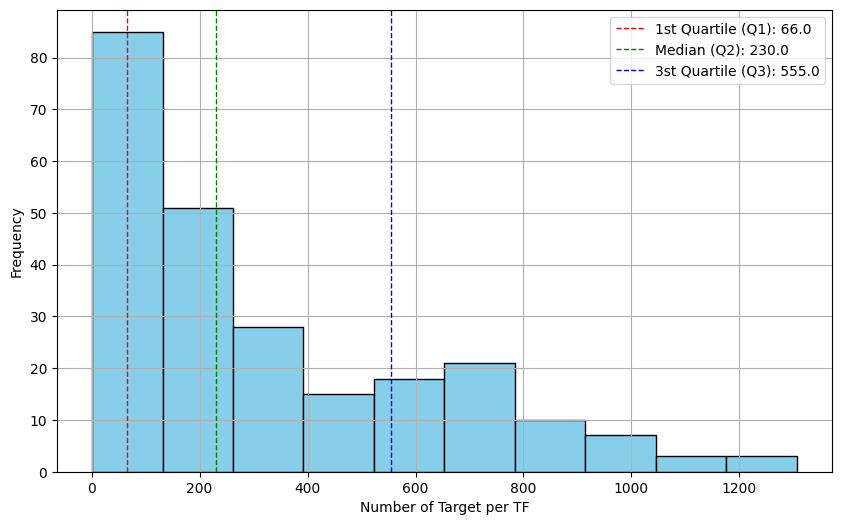

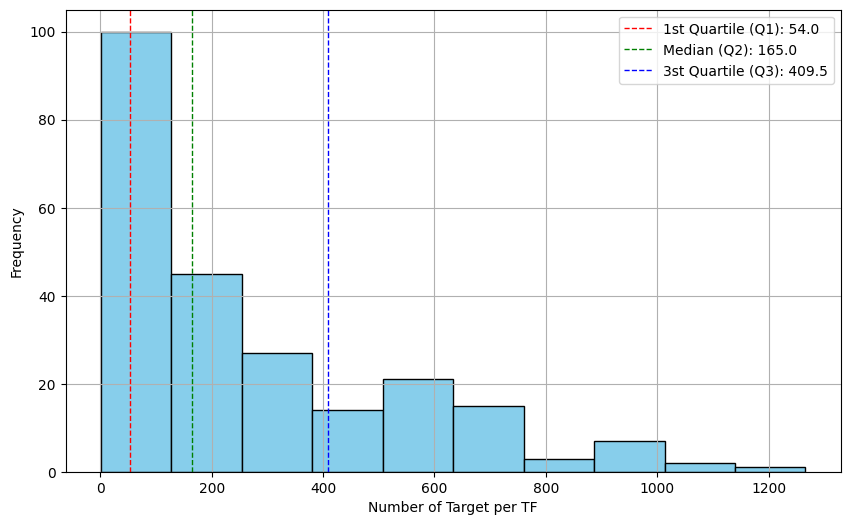

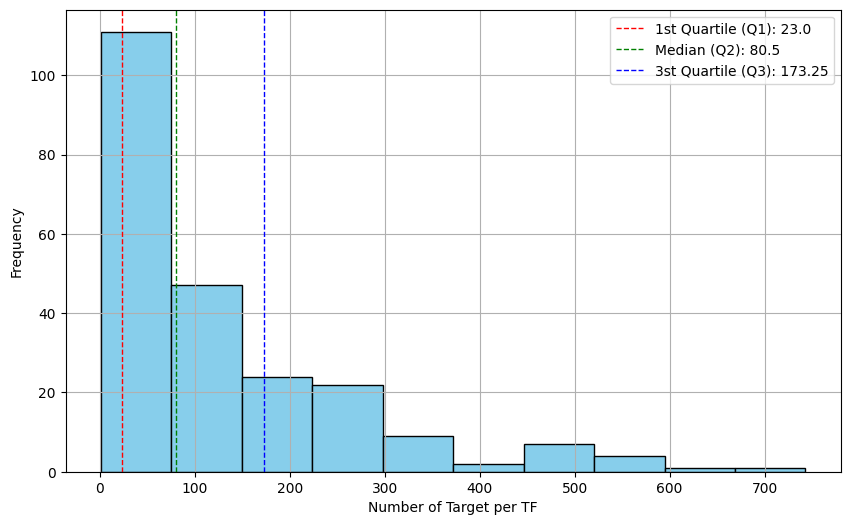

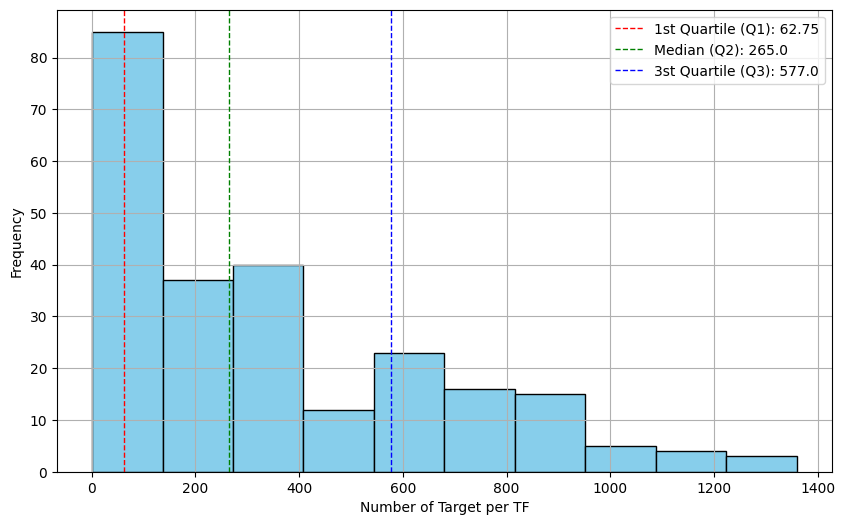

In [7]:
dist_plot2(number_targets_IP)
dist_plot2(number_targets_ME)
dist_plot2(number_targets_PG)
dist_plot2(number_targets_EG)

In [8]:
tf_IP_10targets = number_targets_IP[number_targets_IP >= 10].index
GRN_iPSC_filt = GRN_iPSC_filt[GRN_iPSC_filt['source'].isin(tf_IP_10targets)]
GRN_iPSC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
13,13,EGR1,A4GALT,-0.011337,0.011337,2.955064e-11,10.529433
21,21,FOS,A4GALT,0.011398,0.011398,1.493396e-09,8.825825
24,24,FOXP4,A4GALT,0.023915,0.023915,4.643730e-14,13.333133
25,25,SNAI1,A4GALT,0.010837,0.010837,2.070093e-13,12.684010
29,29,ELF3,A4GALT,0.013303,0.013303,5.879207e-13,12.230681
...,...,...,...,...,...,...,...
350434,350434,ZNF165,ZYG11A,0.013430,0.013430,9.960155e-12,11.001734
350451,350451,BHLHE40,ZYG11A,0.011117,0.011117,1.016146e-08,7.993044
350461,350461,ATF3,ZYG11A,0.014585,0.014585,5.512019e-15,14.258689
350462,350462,ZIC3,ZYG11A,0.022429,0.022429,7.037211e-19,18.152599


In [9]:
tf_ME_10targets = number_targets_ME[number_targets_ME >= 10].index
GRN_iMeLC_filt = GRN_iMeLC_filt[GRN_iMeLC_filt['source'].isin(tf_ME_10targets)]
GRN_iMeLC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
3,3,MAF,A4GALT,0.010437,0.010437,9.697370e-13,12.013346
12,12,TFCP2,A4GALT,0.011424,0.011424,6.991379e-13,12.155437
45,45,POLR3G,A4GALT,0.013872,0.013872,1.354756e-11,10.868139
50,50,ZFP57,A4GALT,0.016220,0.016220,2.714614e-15,14.566292
56,56,OVOL2,A4GALT,0.016652,0.016652,6.244700e-14,13.204488
...,...,...,...,...,...,...,...
350434,350434,ZNF165,ZYG11A,0.017363,0.017363,4.585605e-12,11.338603
350441,350441,FOXH1,ZYG11A,0.023062,0.023062,2.598020e-14,13.585357
350450,350450,REST,ZYG11A,0.014005,0.014005,1.156650e-14,13.936798
350452,350452,ZIC2,ZYG11A,-0.015993,0.015993,2.509253e-11,10.600456


In [10]:
tf_PG_10targets = number_targets_PG[number_targets_PG >= 10].index
GRN_PGCLC_filt = GRN_PGCLC_filt[GRN_PGCLC_filt['source'].isin(tf_PG_10targets)]
GRN_PGCLC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
4,4,E2F1,A4GALT,-0.011982,0.011982,1.966049e-09,8.706406
6,6,RFX3,A4GALT,-0.012635,0.012635,7.385996e-09,8.131591
9,9,KLF4,A4GALT,0.027695,0.027695,1.407787e-13,12.851463
11,11,SP8,A4GALT,-0.010359,0.010359,1.637664e-10,9.785775
14,14,FOXB2,A4GALT,0.010374,0.010374,1.412924e-10,9.849881
...,...,...,...,...,...,...,...
350450,350450,REST,ZYG11A,0.016032,0.016032,3.348030e-18,17.475211
350453,350453,MEF2A,ZYG11A,0.010208,0.010208,9.384473e-14,13.027590
350458,350458,NPAS1,ZYG11A,0.011459,0.011459,6.519771e-13,12.185768
350463,350463,TFAP2C,ZYG11A,0.020360,0.020360,2.841033e-19,18.546524


In [11]:
tf_EG_10targets = number_targets_EG[number_targets_EG >= 10].index
GRN_EGCLC_filt = GRN_EGCLC_filt[GRN_EGCLC_filt['source'].isin(tf_EG_10targets)]
GRN_EGCLC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
4,4,E2F1,A4GALT,0.012186,0.012186,2.743329e-10,9.561722
10,10,MYB,A4GALT,-0.011644,0.011644,1.174329e-06,5.930210
13,13,EGR1,A4GALT,-0.021030,0.021030,2.029755e-09,8.692556
15,15,ZNF143,A4GALT,-0.010884,0.010884,1.777862e-10,9.750102
33,33,KLF2,A4GALT,-0.010645,0.010645,5.090827e-11,10.293212
...,...,...,...,...,...,...,...
350359,350359,NPAS1,ZSWIM7,-0.013866,0.013866,3.799716e-13,12.420249
350363,350363,PBX2,ZSWIM7,0.046887,0.046887,2.019494e-13,12.694757
350367,350367,KLF6,ZSWIM7,0.033844,0.033844,2.047703e-14,13.688733
350415,350415,TCF7L2,ZYG11A,0.010945,0.010945,1.534989e-10,9.813895


#### DMGs

In [12]:
DM_hPGCLC_iPSC = pd.read_excel('DMRAnnotated/DMRs_hPGCLCsvshiPSCs.xlsx')
DM_hPGCLC_hEGCLC = pd.read_excel('DMRAnnotated/DMRs_hPGCLCsvshEGCLCs.xlsx')
DM_iPSC_hEGCLC = pd.read_excel('DMRAnnotated/DMRs_hiPSCsvshEGCLCs.xlsx')

In [13]:
tot_geni_DM_PGvsiPSC = DM_hPGCLC_iPSC['hgnc_symbol'].unique().tolist()
tot_geni_DM_PGvsEG = DM_hPGCLC_hEGCLC['hgnc_symbol'].unique().tolist()
tot_geni_DM_iPSCvsEG = DM_iPSC_hEGCLC['hgnc_symbol'].unique().tolist()

#### k-means DEGs

In [14]:
cluster0_kmeans = pd.read_excel('genes_in_cluster_0.xlsx')
cluster1_kmeans = pd.read_excel('genes_in_cluster_1.xlsx')
cluster2_kmeans = pd.read_excel('genes_in_cluster_2.xlsx')
cluster3_kmeans = pd.read_excel('genes_in_cluster_3.xlsx')
cluster4_kmeans = pd.read_excel('genes_in_cluster_4.xlsx')
cluster5_kmeans = pd.read_excel('genes_in_cluster_5.xlsx')
cluster6_kmeans = pd.read_excel('genes_in_cluster_6.xlsx')
cluster7_kmeans = pd.read_excel('genes_in_cluster_7.xlsx')
cluster8_kmeans = pd.read_excel('genes_in_cluster_8.xlsx')
cluster9_kmeans = pd.read_excel('genes_in_cluster_9.xlsx')
cluster10_kmeans = pd.read_excel('genes_in_cluster_10.xlsx')
cluster11_kmeans = pd.read_excel('genes_in_cluster_11.xlsx')
cluster12_kmeans = pd.read_excel('genes_in_cluster_12.xlsx')
cluster13_kmeans = pd.read_excel('genes_in_cluster_13.xlsx')
cluster14_kmeans = pd.read_excel('genes_in_cluster_14.xlsx')

In [15]:
cluster0_gene = cluster0_kmeans['Unnamed: 0'].to_list()
cluster1_gene = cluster1_kmeans['Unnamed: 0'].to_list()
cluster2_gene = cluster2_kmeans['Unnamed: 0'].to_list()
cluster3_gene = cluster3_kmeans['Unnamed: 0'].to_list()
cluster4_gene = cluster4_kmeans['Unnamed: 0'].to_list()
cluster5_gene = cluster5_kmeans['Unnamed: 0'].to_list()
cluster6_gene = cluster6_kmeans['Unnamed: 0'].to_list()
cluster7_gene = cluster7_kmeans['Unnamed: 0'].to_list()
cluster8_gene = cluster8_kmeans['Unnamed: 0'].to_list()
cluster9_gene = cluster9_kmeans['Unnamed: 0'].to_list()
cluster10_gene = cluster10_kmeans['Unnamed: 0'].to_list()
cluster11_gene = cluster11_kmeans['Unnamed: 0'].to_list()
cluster12_gene = cluster12_kmeans['Unnamed: 0'].to_list()
cluster13_gene = cluster13_kmeans['Unnamed: 0'].to_list()
cluster14_gene = cluster14_kmeans['Unnamed: 0'].to_list()

In [16]:
clusters_genes = [cluster0_gene, cluster1_gene, cluster2_gene,
            cluster3_gene, cluster4_gene, cluster5_gene, cluster6_gene,
            cluster7_gene, cluster8_gene, cluster9_gene, cluster10_gene,
            cluster11_gene, cluster12_gene, cluster13_gene, cluster14_gene]

In [17]:
kmeans_1_5 = set(cluster1_gene + cluster5_gene)
kmeans_1_5 = list(kmeans_1_5)
len(kmeans_1_5)

1889

In [18]:
kmeans_2_6 = set(cluster2_gene + cluster6_gene)
kmeans_2_6 = list(kmeans_2_6)
len(kmeans_2_6)

1871

In [19]:
cluster2_kmeans

,Unnamed: 0,logFC.celltypes_leveledhEGCLC,logFC.celltypes_leveledhPGCLC,logFC.celltypes_levelediMeLC,logCPM,LR,PValue,FDR,clusters
0,FST,-1.177654,0.328728,5.474972,7.192167,2243.012713,0.000000,0.000000,2
1,VASH1,-1.153742,4.042172,-0.580513,7.137133,1713.609937,0.000000,0.000000,2
2,TFAP2C,-1.056494,5.416394,1.400894,8.368850,2019.563791,0.000000,0.000000,2
3,CACNA2D2,-0.692511,4.543920,-1.590436,8.316615,1725.366634,0.000000,0.000000,2
4,SMAGP,-0.609917,4.167067,-0.032716,7.181970,1565.755661,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...
1494,HIST1H4J,0.364433,0.211762,1.123251,3.989923,15.195154,0.001657,0.002515,2
1495,LYRM2,0.608084,1.075917,0.573123,3.376824,14.442187,0.002361,0.003517,2
1496,PTGES3L,0.759927,1.039564,0.882685,3.358153,14.057661,0.002828,0.004176,2
1497,ZNF780B,0.674144,1.024682,0.727106,3.503380,13.536226,0.003609,0.005251,2


#### Expected_up = [cluster 2+6 up PGC] & [(low meth PGC vs iPSC) | (low meth PGC vs EG)]

In [20]:
LM_PGvsiPSC = DM_hPGCLC_iPSC[DM_hPGCLC_iPSC['diff.MethyhiPSCs-hPGCLCs'] > 0]
LM_PGvsiPSC_list = LM_PGvsiPSC['hgnc_symbol'].unique().tolist()
LM_PGvsiPSC

,seqnames,start,end,width,strand,length,nCG,meanMethyhiPSCs,meanMethyhPGCLCs,diff.MethyhiPSCs-hPGCLCs,areaStat,ChipSeekerAnn,hgnc_symbol,gene_biotype
2,chr11,315262,317011,1750,*,1751,93,0.516360,0.177217,0.339143,3136.660612,Promoter (<=1kb),IFITM1,protein_coding
8,chr13,113022412,113023593,1182,*,1183,55,0.767662,0.198155,0.569507,2136.353651,Promoter (1-2kb),MCF2L,protein_coding
13,chr17,82875178,82875953,776,*,777,26,0.805230,0.203102,0.602128,908.791067,"Intron (ENST00000355528.9/ENSG00000141556.21, ...",TBCD,protein_coding
14,chr4,6688957,6689447,491,*,492,21,0.746715,0.109023,0.637692,844.883445,Promoter (1-2kb),LINC02481,lncRNA
16,chr21,46140006,46141020,1015,*,1016,30,0.852938,0.382603,0.470335,777.982251,Promoter (1-2kb),FTCD,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,chr6,131061058,131061189,132,*,133,4,0.853553,0.411095,0.442457,40.907887,Promoter (1-2kb),EPB41L2,protein_coding
1901,chrX,106920390,106920475,86,*,87,4,0.637775,0.225380,0.412395,40.618750,Promoter (<=1kb),CLDN2,protein_coding
1902,chr1,41503846,41503976,131,*,132,4,0.734979,0.299798,0.435181,40.211150,Distal Intergenic,EDN2,protein_coding
1903,chr1,192983532,192983590,59,*,60,4,0.810811,0.407738,0.403074,40.026621,Distal Intergenic,ZNF101P2,processed_pseudogene


In [21]:
LM_PGvsEG = DM_hPGCLC_hEGCLC[DM_hPGCLC_hEGCLC['diff.MethyhEGCLCs-hPGCLCs'] > 0]
LM_PGvsEG_list = LM_PGvsEG['hgnc_symbol'].unique().tolist()
LM_PGvsEG

,seqnames,start,end,width,strand,length,nCG,meanMethyhEGCLCs,meanMethyhPGCLCs,diff.MethyhEGCLCs-hPGCLCs,areaStat,ChipSeekerAnn,hgnc_symbol,gene_biotype
140,chr13,113022412,113023593,1182,*,1183,55,0.680361,0.198155,0.482206,1853.639233,Promoter (1-2kb),MCF2L,protein_coding
296,chr17,82875242,82875953,712,*,713,25,0.824031,0.189483,0.634548,1025.564416,"Intron (ENST00000355528.9/ENSG00000141556.21, ...",TBCD,protein_coding
342,chr4,6688957,6689447,491,*,492,21,0.686484,0.109023,0.577461,801.924394,Promoter (1-2kb),LINC02481,lncRNA
349,chr4,134201320,134201951,632,*,633,50,0.598049,0.221826,0.376223,780.620797,Promoter (<=1kb),PABPC4L,protein_coding
363,chr12,121805798,121807062,1265,*,1266,36,0.674091,0.237712,0.436379,724.383849,Promoter (1-2kb),SETD1B,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,chr15,25783669,25783718,50,*,51,4,0.598025,0.121523,0.476503,39.828829,Promoter (<=1kb),ATP10A,protein_coding
2096,chr10,86672553,86674114,1562,*,1563,4,0.824302,0.394263,0.430040,37.118959,"Intron (ENST00000623056.4/ENSG00000122367.20, ...",LDB3,protein_coding
2097,chr8,76810924,76810999,76,*,77,4,0.831456,0.340330,0.491126,36.828297,"Intron (ENST00000651372.2/ENSG00000091656.19, ...",ZFHX4,protein_coding
2098,chr8,144198100,144198304,205,*,206,4,0.875118,0.439952,0.435166,35.675492,Promoter (<=1kb),MROH1,protein_coding


In [22]:
LMgenes_PG = set(LM_PGvsiPSC_list + LM_PGvsEG_list)
len(LMgenes_PG)

1717

In [23]:
expected_up = [gene for gene in kmeans_2_6 if gene in LMgenes_PG]
len(expected_up)

315

#### Expected_down = [cluster 1+5 down PGC] & [(high meth PGC vs iPSC) | (high meth PGC vs EG)]

In [24]:
HM_PGvsiPSC = DM_hPGCLC_iPSC[DM_hPGCLC_iPSC['diff.MethyhiPSCs-hPGCLCs'] < 0]
HM_PGvsiPSC_list = HM_PGvsiPSC['hgnc_symbol'].unique().tolist()
HM_PGvsiPSC

,seqnames,start,end,width,strand,length,nCG,meanMethyhiPSCs,meanMethyhPGCLCs,diff.MethyhiPSCs-hPGCLCs,areaStat,ChipSeekerAnn,hgnc_symbol,gene_biotype
0,chr19,45396154,45397055,902,*,903,99,0.062659,0.510500,-0.447841,-3900.366653,Promoter (2-3kb),PPP1R13L,protein_coding
1,chr1,40303423,40304258,836,*,837,61,0.083519,0.746259,-0.662740,-3393.603657,Promoter (<=1kb),COL9A2,protein_coding
3,chr12,6329107,6329910,804,*,805,72,0.239183,0.714567,-0.475384,-2805.981286,Promoter (1-2kb),TNFRSF1A,protein_coding
4,chr7,5388141,5388967,827,*,828,82,0.151733,0.539237,-0.387504,-2785.182174,Promoter (<=1kb),TNRC18,protein_coding
5,chr12,114674210,114675406,1197,*,1198,73,0.022812,0.530622,-0.507810,-2689.567789,"Exon (ENST00000257566.7/ENSG00000135111.16, ex...",TBX3,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,chr5,72238871,72239091,221,*,222,4,0.076622,0.573147,-0.496525,-50.465300,Promoter (<=1kb),MRPS27,protein_coding
1753,chr13,27963063,27963125,63,*,64,4,0.114860,0.533999,-0.419138,-49.286833,3' UTR,CDX2,protein_coding
1800,chr18,686280,686364,85,*,86,4,0.356524,0.759282,-0.402758,-46.848331,Promoter (<=1kb),ENOSF1,protein_coding
1807,chr14,73287178,73287261,84,*,85,4,0.317001,0.794182,-0.477181,-46.566883,Promoter (<=1kb),NUMB,protein_coding


In [25]:
HM_PGvsEG = DM_hPGCLC_hEGCLC[DM_hPGCLC_hEGCLC['diff.MethyhEGCLCs-hPGCLCs'] < 0]
HM_PGvsEG_list = HM_PGvsEG['hgnc_symbol'].unique().tolist()
HM_PGvsEG

,seqnames,start,end,width,strand,length,nCG,meanMethyhEGCLCs,meanMethyhPGCLCs,diff.MethyhEGCLCs-hPGCLCs,areaStat,ChipSeekerAnn,hgnc_symbol,gene_biotype
0,chr1,248847057,248848595,1539,*,1540,152,0.336505,0.938871,-0.602366,-7627.745925,5' UTR,ZNF692,protein_coding
1,chr8,38973989,38975246,1258,*,1259,95,0.100581,0.770406,-0.669825,-7260.764787,Promoter (<=1kb),HTRA4,protein_coding
2,chr11,64368176,64370713,2538,*,2539,155,0.283509,0.899267,-0.615758,-7087.566102,Promoter (<=1kb),MIR1237,miRNA
3,chr15,65076644,65077714,1071,*,1072,125,0.431976,0.929163,-0.497187,-6119.045708,Promoter (<=1kb),RASL12,protein_coding
4,chr5,172669729,172670381,653,*,654,89,0.188197,0.736755,-0.548558,-5142.170248,"Exon (ENST00000369800.6/ENSG00000214357.9, exo...",MIR5003,miRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,chr7,82508513,82508620,108,*,109,4,0.435300,0.843219,-0.407920,-53.485287,Distal Intergenic,CACNA2D1,protein_coding
1992,chrX,51742393,51742737,345,*,346,4,0.104253,0.537215,-0.432961,-49.391265,Promoter (<=1kb),GSPT2,protein_coding
2028,chr6,13422299,13422382,84,*,85,4,0.191870,0.649639,-0.457769,-47.339880,"Intron (ENST00000379287.4/ENSG00000145990.11, ...",GFOD1,protein_coding
2037,chr4,107906748,107906976,229,*,230,4,0.302545,0.696860,-0.394315,-46.591734,Promoter (<=1kb),SGMS2,protein_coding


In [26]:
HMgenes_PG = set(HM_PGvsiPSC_list + HM_PGvsEG_list)
len(HMgenes_PG)

614

In [27]:
expected_down = [gene for gene in kmeans_1_5 if gene in HMgenes_PG]
len(expected_down)

36

#### Expected_all = Expected up | Expected down

In [28]:
expected_all = set(expected_up + expected_down)
len(expected_all)

351

#### Expected_up_2 = [cluster 2+6 up PGC] | [(low meth PGC vs iPSC) & (low meth PGC vs EG)]

In [29]:
LMgenes_PG_union = [gene for gene in LM_PGvsiPSC_list if gene in LM_PGvsEG_list]
len(LMgenes_PG_union)

1193

In [30]:
expected_up_2 = set(kmeans_2_6 + LMgenes_PG_union)
len(expected_up_2)

2841

#### Expected_down_2 = [cluster 1+5 down PGC] | [(high meth PGC vs iPSC) & (high meth PGC vs EG)]

In [31]:
HMgenes_PG_union = [gene for gene in HM_PGvsiPSC_list if gene in HM_PGvsEG_list]
len(HMgenes_PG_union)

42

In [32]:
expected_down_2 = set(kmeans_1_5 + HMgenes_PG_union)
len(expected_down_2)

1927

#### Expected_all_2 = Expected up 2 | Expected down 2

In [33]:
expected_all_2 = set(list(expected_up_2) + list(expected_down_2))
len(expected_all_2)

4672

#### How many genes of the different lists are in the GRNs?

In [34]:
target_GRNiPSC = GRN_iPSC['target'].unique()
target_GRNiMeLC = GRN_iMeLC['target'].unique()
target_GRNhPGCLC = GRN_hPGCLC['target'].unique()
target_GRNhEGCLC = GRN_hEGCLC['target'].unique()

In [35]:
print(len(target_GRNiPSC))
print(len(target_GRNiMeLC))
print(len(target_GRNhPGCLC))
print(len(target_GRNhEGCLC))

2895
2895
2895
2895


In [36]:
TF_GRNiPSC = GRN_iPSC['source'].unique()
TF_GRNiMeLC = GRN_iMeLC['source'].unique()
TF_GRNhPGCLC = GRN_hPGCLC['source'].unique()
TF_GRNhEGCLC = GRN_hEGCLC['source'].unique()

In [37]:
print(len(TF_GRNiPSC))
print(len(TF_GRNiMeLC))
print(len(TF_GRNhPGCLC))
print(len(TF_GRNhEGCLC))

255
255
255
255


In [38]:
common_expected_up_GRNiPSC = set(expected_up).intersection(set(target_GRNiPSC))
print('Expected_up targets in GRN {} on {}'.format(len(common_expected_up_GRNiPSC), len(expected_up)))

common_expected_down_GRNiPSC = set(expected_down).intersection(set(target_GRNiPSC))
print('Expected_down targets in GRN {} on {}'.format(len(common_expected_down_GRNiPSC), len(expected_down)))

common_expected_all_GRNiPSC = set(expected_all).intersection(set(target_GRNiPSC))
print('Expected_all targets in GRN {} on {}'.format(len(common_expected_all_GRNiPSC), len(expected_all)))

common_expected_up2_GRNiPSC = set(expected_up_2).intersection(set(target_GRNiPSC))
print('Expected_up2 targets in GRN {} on {}'.format(len(common_expected_up2_GRNiPSC), len(expected_up_2)))

common_expected_down2_GRNiPSC = set(expected_down_2).intersection(set(target_GRNiPSC))
print('Expected_down2 targets in GRN {} on {}'.format(len(common_expected_down2_GRNiPSC), len(expected_down_2)))

common_expected_all2_GRNiPSC = set(expected_all_2).intersection(set(target_GRNiPSC))
print('Expected_all2 targets in GRN {} on {}'.format(len(common_expected_all2_GRNiPSC), len(expected_all_2)))

Expected_up targets in GRN 157 on 315
Expected_down targets in GRN 11 on 36
Expected_all targets in GRN 168 on 351
Expected_up2 targets in GRN 826 on 2841
Expected_down2 targets in GRN 480 on 1927
Expected_all2 targets in GRN 1281 on 4672


In [39]:
commonTF_expected_up_GRNiPSC = set(expected_up).intersection(set(TF_GRNiPSC))
print('Expected_up TFs in GRN {} on {}'.format(len(commonTF_expected_up_GRNiPSC), len(expected_up)))

commonTF_expected_down_GRNiPSC = set(expected_down).intersection(set(TF_GRNiPSC))
print('Expected_down TFs in GRN {} on {}'.format(len(commonTF_expected_down_GRNiPSC), len(expected_down)))

commonTF_expected_all_GRNiPSC = set(expected_all).intersection(set(TF_GRNiPSC))
print('Expected_all TFs in GRN {} on {}'.format(len(commonTF_expected_all_GRNiPSC), len(expected_all)))

commonTF_expected_up2_GRNiPSC = set(expected_up_2).intersection(set(TF_GRNiPSC))
print('Expected_up2 TFs in GRN {} on {}'.format(len(commonTF_expected_up2_GRNiPSC), len(expected_up_2)))

commonTF_expected_down2_GRNiPSC = set(expected_down_2).intersection(set(TF_GRNiPSC))
print('Expected_down2 TFs in GRN {} on {}'.format(len(commonTF_expected_down2_GRNiPSC), len(expected_down_2)))

commonTF_expected_all2_GRNiPSC = set(expected_all_2).intersection(set(TF_GRNiPSC))
print('Expected_all2 TFs in GRN {} on {}'.format(len(commonTF_expected_all2_GRNiPSC), len(expected_all_2)))

Expected_up TFs in GRN 12 on 315
Expected_down TFs in GRN 1 on 36
Expected_all TFs in GRN 13 on 351
Expected_up2 TFs in GRN 69 on 2841
Expected_down2 TFs in GRN 29 on 1927
Expected_all2 TFs in GRN 95 on 4672


#### Hypergeom and enrichment

In [40]:
TF_iPSC = GRN_iPSC_filt['source'].tolist()
TF_iPSC = list(set(TF_iPSC))

TF_iMeLC = GRN_iMeLC_filt['source'].tolist()
TF_iMeLC = list(set(TF_iMeLC))

TF_hPGCLC = GRN_PGCLC_filt['source'].tolist()
TF_hPGCLC = list(set(TF_hPGCLC))

TF_hEGCLC = GRN_EGCLC_filt['source'].tolist()
TF_hEGCLC = list(set(TF_hEGCLC))

In [41]:
def compute_enrichment(TFs, GRN_filt, universo, DMDEs, p_value_threshold):
    
    enrichment_res = []

    for tf in TFs:
        group = GRN_filt[GRN_filt['source'] == tf]
        target_tot = len(group['target'])
        target_DMDE = len(group[group['target'].isin(DMDEs)])
        
        pValueTFx = hypergeom.sf(target_DMDE-1, len(universo), target_tot, len(DMDEs))

        GRN_TF_expressedGenes = group[group['target'].isin(universo)]
        n_targets_expressed = len(GRN_TF_expressedGenes)
        
        GRN_tf_DMDE = group[group['target'].isin(DMDEs)]
        n_targets_DMDE = len(GRN_tf_DMDE)

        if n_targets_expressed == 0:
            ratioTargets = float('nan')
        else:
            ratioTargets = n_targets_DMDE / n_targets_expressed
        
        ratioDMDE = len(DMDEs) / len(universo)
        
        enrichment = ratioTargets / ratioDMDE
        
        enrichment_res.append({
            'TF': tf,
            'targetTF': target_tot,
            'targetDMDE': target_DMDE,
            'pValue': pValueTFx,
            'enrichment': enrichment
        })

    enrichment_df = pd.DataFrame(enrichment_res)
    significant_enrichment_df = enrichment_df[enrichment_df['pValue'] < p_value_threshold]
    
    return significant_enrichment_df

In [42]:
universo = set()

for cluster in clusters_genes:
    universo.update(cluster)

universo.update(tot_geni_DM_PGvsiPSC)
universo.update(tot_geni_DM_PGvsEG)
universo.update(tot_geni_DM_iPSCvsEG)

In [43]:
len(universo)

6659

In [44]:
expected_up_enrichment_iPSC = compute_enrichment(TF_iPSC, GRN_iPSC_filt, universo, expected_up, p_value_threshold=0.05)
print(expected_up_enrichment_iPSC.sort_values(by='enrichment', ascending=False))
expected_up_enrichment_iPSC.to_csv('expected_up_enrichment_iPSC.csv', index=False)

expected_up_enrichment_iMeLC = compute_enrichment(TF_iMeLC, GRN_iMeLC_filt, universo, expected_up, p_value_threshold=0.05)
print(expected_up_enrichment_iMeLC.sort_values(by='enrichment', ascending=False))
expected_up_enrichment_iMeLC.to_csv('expected_up_enrichment_iMeLC.csv', index=False)

expected_up_enrichment_PG = compute_enrichment(TF_hPGCLC, GRN_PGCLC_filt, universo, expected_up, p_value_threshold=0.05)
print(expected_up_enrichment_PG.sort_values(by='enrichment', ascending=False))
expected_up_enrichment_PG.to_csv('expected_up_enrichment_PG.csv', index=False)

expected_up_enrichment_EG = compute_enrichment(TF_hEGCLC, GRN_EGCLC_filt, universo, expected_up, p_value_threshold=0.05)
print(expected_up_enrichment_EG.sort_values(by='enrichment', ascending=False))
expected_up_enrichment_EG.to_csv('expected_up_enrichment_EG.csv', index=False)

          TF  targetTF  targetDMDE    pValue  enrichment
80    PKNOX2        49           6  0.026928    5.514700
1       TBX3        25           4  0.028308    4.697707
77      GBX2       149          16  0.001716    3.979234
203     LMO2       243          26  0.000072    3.639945
48     FOXP1       457          38  0.000403    2.931781
113    ATOH8       109          10  0.032884    2.895847
129   TCF7L1       301          22  0.027174    2.784868
164    MEF2B       235          18  0.029051    2.737513
83      BCL6       211          16  0.041336    2.642460
165   PRDM11       215          16  0.047692    2.562386
91     NR2F2       287          21  0.030173    2.522348
142    NR5A2       393          28  0.018647    2.508098
15     FOXB1       299          21  0.044033    2.466296
157    GLIS3       646          46  0.002817    2.377568
152     E2F7       730          47  0.016227    2.360012
90     FOSL2       328          24  0.021337    2.359779
86      E2F2       555         

In [45]:
expected_up2_enrichment_iPSC = compute_enrichment(TF_iPSC, GRN_iPSC_filt, universo, expected_up_2, p_value_threshold=0.05)
print(expected_up2_enrichment_iPSC.sort_values(by='enrichment', ascending=False))

expected_up2_enrichment_iMeLC = compute_enrichment(TF_iMeLC, GRN_iMeLC_filt, universo, expected_up_2, p_value_threshold=0.05)
print(expected_up2_enrichment_iMeLC.sort_values(by='enrichment', ascending=False))

expected_up2_enrichment_PG = compute_enrichment(TF_hPGCLC, GRN_PGCLC_filt, universo, expected_up_2, p_value_threshold=0.05)
print(expected_up2_enrichment_PG.sort_values(by='enrichment', ascending=False))

expected_up2_enrichment_EG = compute_enrichment(TF_hEGCLC, GRN_EGCLC_filt, universo, expected_up_2, p_value_threshold=0.05)
print(expected_up2_enrichment_EG.sort_values(by='enrichment', ascending=False))

Empty DataFrame
Columns: [TF, targetTF, targetDMDE, pValue, enrichment]
Index: []
Empty DataFrame
Columns: [TF, targetTF, targetDMDE, pValue, enrichment]
Index: []
         TF  targetTF  targetDMDE        pValue  enrichment
117   HOXC5        14          10  2.855208e-02    2.343893
13   ZNF232        12           9  2.427715e-02    2.343893
95     JUNB        91          64  7.300515e-08    2.054920
165    SOX7        18          13  1.083850e-02    2.031374
118   DDIT3        79          45  7.029497e-03    2.028369
..      ...       ...         ...           ...         ...
42   TFAP2A       405         206  3.698634e-04    1.631223
22     ATF3       236         117  1.738710e-02    1.576066
62      ID1       295         165  1.892897e-06    1.565758
155   FOXD3        61          35  1.420525e-02    1.491568
184    ZIC2       124          63  3.985584e-02    1.476653

[68 rows x 5 columns]
Empty DataFrame
Columns: [TF, targetTF, targetDMDE, pValue, enrichment]
Index: []


In [46]:
expected_down_enrichment_iPSC = compute_enrichment(TF_iPSC, GRN_iPSC_filt, universo, expected_down, p_value_threshold=0.05)
print(expected_down_enrichment_iPSC.sort_values(by='enrichment', ascending=False))
expected_down_enrichment_iPSC.to_csv('expected_down_enrichment_iPSC.csv', index=False)

expected_down_enrichment_iMeLC = compute_enrichment(TF_iMeLC, GRN_iMeLC_filt, universo, expected_down, p_value_threshold=0.05)
print(expected_down_enrichment_iMeLC.sort_values(by='enrichment', ascending=False))
expected_down_enrichment_iMeLC.to_csv('expected_down_enrichment_iMeLC.csv', index=False)

expected_down_enrichment_PG = compute_enrichment(TF_hPGCLC, GRN_PGCLC_filt, universo, expected_down, p_value_threshold=0.05)
print(expected_down_enrichment_PG.sort_values(by='enrichment', ascending=False))
expected_down_enrichment_PG.to_csv('expected_down_enrichment_PG.csv', index=False)

expected_down_enrichment_EG = compute_enrichment(TF_hEGCLC, GRN_EGCLC_filt, universo, expected_down, p_value_threshold=0.05)
print(expected_down_enrichment_EG.sort_values(by='enrichment', ascending=False))
expected_down_enrichment_EG.to_csv('expected_down_enrichment_EG.csv', index=False)

          TF  targetTF  targetDMDE    pValue  enrichment
208   POU3F4        27           2  0.009163   23.121528
147     IRX3        45           2  0.024321   15.414352
73      IRX5       170           4  0.012779    8.407828
189   ZNF816       151           4  0.008515    7.871158
165   PRDM11       215           4  0.027745    5.605219
7      ZBTB6       231           4  0.034858    5.563074
201  ONECUT1       250           4  0.044581    4.773477
218  CREB3L1       646           8  0.019635    3.699444
40     FOXO1       500           6  0.049310    3.699444
4     ZNF165       670           8  0.023960    3.582997
118     E2F1       900           9  0.045840    3.251465
          TF  targetTF  targetDMDE    pValue  enrichment
211  CREB3L1       580           8  0.010686    4.043109
      TF  targetTF  targetDMDE    pValue  enrichment
56  CDX2        61           2  0.042609    7.707176
          TF  targetTF  targetDMDE    pValue  enrichment
169    SNAI2        62           3  0.0

In [47]:
expected_down2_enrichment_iPSC = compute_enrichment(TF_iPSC, GRN_iPSC_filt, universo, expected_down_2, p_value_threshold=0.05)
print(expected_down2_enrichment_iPSC.sort_values(by='enrichment', ascending=False))

expected_down2_enrichment_iMeLC = compute_enrichment(TF_iMeLC, GRN_iMeLC_filt, universo, expected_down_2, p_value_threshold=0.05)
print(expected_down2_enrichment_iMeLC.sort_values(by='enrichment', ascending=False))

expected_down2_enrichment_PG = compute_enrichment(TF_hPGCLC, GRN_PGCLC_filt, universo, expected_down_2, p_value_threshold=0.05)
print(expected_down2_enrichment_PG.sort_values(by='enrichment', ascending=False))

expected_down2_enrichment_EG = compute_enrichment(TF_hEGCLC, GRN_EGCLC_filt, universo, expected_down_2, p_value_threshold=0.05)
print(expected_down2_enrichment_EG.sort_values(by='enrichment', ascending=False))

          TF  targetTF  targetDMDE    pValue  enrichment
8     ZNF467        33          17  0.005154    2.670260
143     TP63        45          22  0.003590    2.452383
125     EBF1        47          21  0.015340    2.267758
85     HOXB6        68          29  0.010570    2.178550
106    PPARA       126          51  0.003346    2.098061
137    PRRX2       124          46  0.029279    2.091566
189   ZNF816       151          56  0.017625    2.058673
33    POU4F1       174          61  0.044598    2.026860
72     INSM1       141          54  0.009792    2.006495
122    BARX1       147          58  0.003621    2.004266
17   BHLHE41       196          76  0.001679    1.989605
113    ATOH8       109          41  0.030355    1.940834
67     HOXB2       248          85  0.036081    1.932425
30       VDR       272          97  0.008404    1.841737
90     FOSL2       328         112  0.020309    1.800142
102      SP6       436         143  0.038320    1.727815
        TF  targetTF  targetDMD

In [48]:
expected_all_enrichment_iPSC = compute_enrichment(TF_iPSC, GRN_iPSC_filt, universo, expected_all, p_value_threshold=0.05)
print(expected_all_enrichment_iPSC.sort_values(by='enrichment', ascending=False))
expected_all_enrichment_iPSC.to_csv('expected_all_enrichment_iPSC.csv', index=False)

expected_all_enrichment_iMeLC = compute_enrichment(TF_iMeLC, GRN_iMeLC_filt, universo, expected_all, p_value_threshold=0.05)
print(expected_all_enrichment_iMeLC.sort_values(by='enrichment', ascending=False))
expected_all_enrichment_iMeLC.to_csv('expected_all_enrichment_iMeLC.csv', index=False)

expected_all_enrichment_PG = compute_enrichment(TF_hPGCLC, GRN_PGCLC_filt, universo, expected_all, p_value_threshold=0.05)
print(expected_all_enrichment_PG.sort_values(by='enrichment', ascending=False))
expected_all_enrichment_PG.to_csv('expected_all_enrichment_PG.csv', index=False)

expected_all_enrichment_EG = compute_enrichment(TF_hEGCLC, GRN_EGCLC_filt, universo, expected_all, p_value_threshold=0.05)
print(expected_all_enrichment_EG.sort_values(by='enrichment', ascending=False))
expected_all_enrichment_EG.to_csv('expected_all_enrichment_EG.csv', index=False)

          TF  targetTF  targetDMDE    pValue  enrichment
51     FOXD1        14           3  0.034260    5.691453
80    PKNOX2        49           6  0.042459    4.949090
147     IRX3        45           6  0.029433    4.742877
1       TBX3        25           4  0.039921    4.215891
213    PITX2        45           6  0.029433    3.794302
77      GBX2       149          16  0.005044    3.571108
203     LMO2       243          27  0.000172    3.392257
48     FOXP1       457          42  0.000239    2.908042
165   PRDM11       215          20  0.009224    2.874471
164    MEF2B       235          21  0.011954    2.866199
113    ATOH8       109          11  0.027971    2.858721
129   TCF7L1       301          24  0.027010    2.726445
83      BCL6       211          18  0.029040    2.667869
91     NR2F2       287          23  0.028521    2.479231
157    GLIS3       646          53  0.000627    2.458411
40     FOXO1       500          38  0.013110    2.403058
86      E2F2       555         

In [49]:
expected_all2_enrichment_iPSC = compute_enrichment(TF_iPSC, GRN_iPSC_filt, universo, expected_all_2, p_value_threshold=0.05)
print(expected_all2_enrichment_iPSC.sort_values(by='enrichment', ascending=False))

expected_all2_enrichment_iMeLC = compute_enrichment(TF_iMeLC, GRN_iMeLC_filt, universo, expected_all_2, p_value_threshold=0.05)
print(expected_all2_enrichment_iMeLC.sort_values(by='enrichment', ascending=False))

expected_all2_enrichment_PG = compute_enrichment(TF_hPGCLC, GRN_PGCLC_filt, universo, expected_all_2, p_value_threshold=0.05)
print(expected_all2_enrichment_PG.sort_values(by='enrichment', ascending=False))

expected_all2_enrichment_EG = compute_enrichment(TF_hEGCLC, GRN_EGCLC_filt, universo, expected_all_2, p_value_threshold=0.05)
print(expected_all2_enrichment_EG.sort_values(by='enrichment', ascending=False))

Empty DataFrame
Columns: [TF, targetTF, targetDMDE, pValue, enrichment]
Index: []
Empty DataFrame
Columns: [TF, targetTF, targetDMDE, pValue, enrichment]
Index: []
          TF  targetTF  targetDMDE        pValue  enrichment
141    MEF2B        20          18  3.644723e-02    1.425300
70      SOX2       109          94  6.362938e-05    1.381218
171     ZIC5       256         192  4.717329e-02    1.375163
155    FOXD3        61          53  1.843259e-03    1.373471
102  TFCP2L1       153         127  1.663723e-04    1.371311
76      ZIC3        43          36  3.230007e-02    1.350284
189    FOXI3       300         253  4.806325e-09    1.340523
20     OVOL1        94          76  1.262683e-02    1.337318
62       ID1       295         231  8.388300e-04    1.332973
60    TFAP2C       539         436  2.514092e-09    1.322193
143    SOX17       147         122  2.263843e-04    1.317322
2       KLF4       492         399  6.964396e-09    1.316423
50      MSX2       106          95  1.28613

In [50]:
def plot_enrichment(df, enrichment_threshold, size_col='targetDMDE', figsize=(8, 6)):

    enrichment_filt = df[df['enrichment'] > enrichment_threshold]

    enrichment_filt = enrichment_filt.sort_values(by='enrichment', ascending=False)

    enrichment_filt['TF'] = pd.Categorical(enrichment_filt['TF'], categories=enrichment_filt['TF'].unique(), ordered=True)

    plt.figure(figsize=figsize)

    dotplot = sns.scatterplot(
        x='enrichment', 
        y='TF',
        hue='pValue', 
        size=size_col,
        data=enrichment_filt,
        palette='viridis',
        sizes=(50, 200),
        legend=True
    )

    plt.xlabel('Enrichment')
    plt.ylabel('Transcription Factors (TF)')
    plt.legend(loc='lower right', prop={'size': 10})
    plt.show()

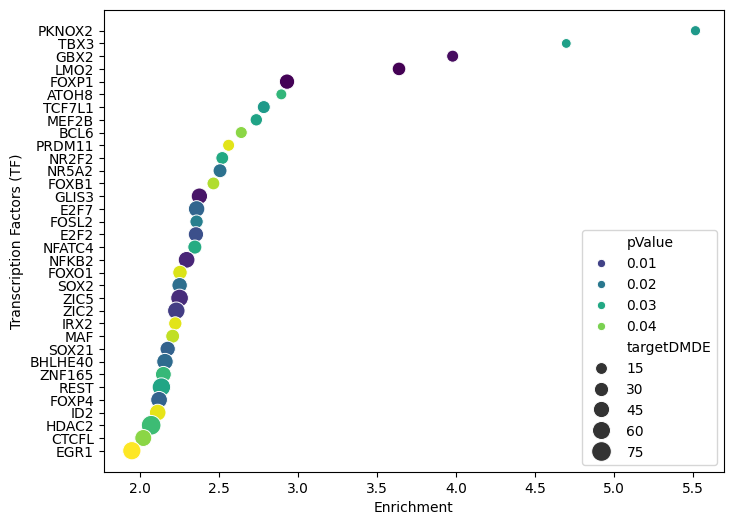

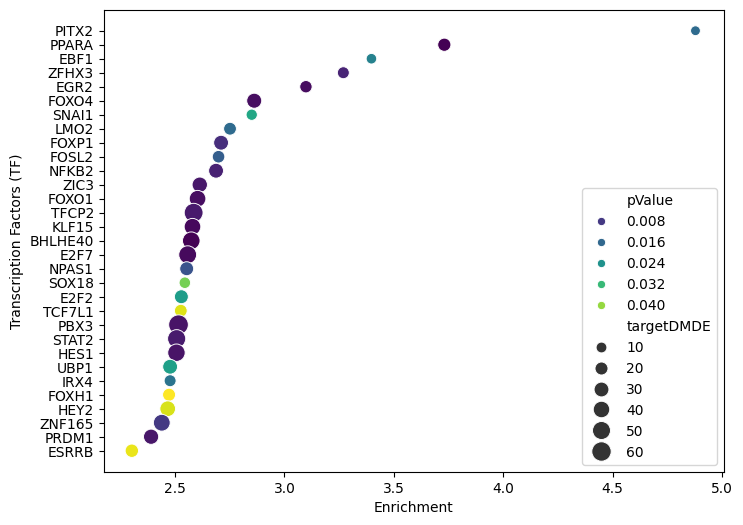

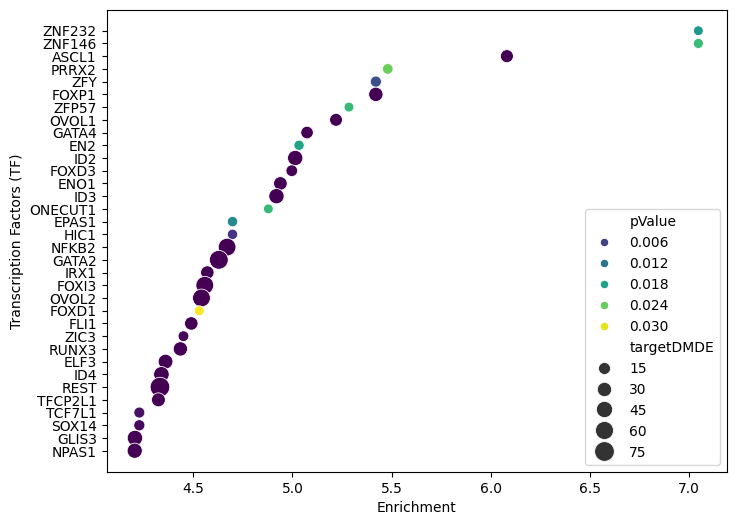

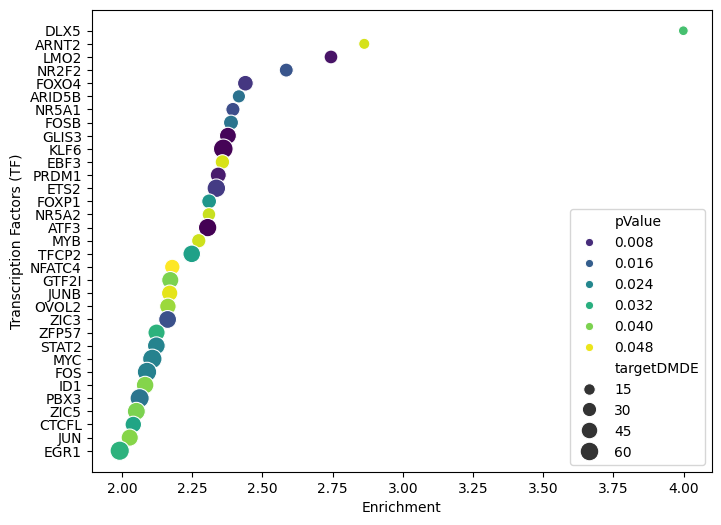

In [51]:
plot_enrichment(expected_up_enrichment_iPSC, enrichment_threshold=1)
plot_enrichment(expected_up_enrichment_iMeLC, enrichment_threshold=2.3)
plot_enrichment(expected_up_enrichment_PG, enrichment_threshold=4.2)
plot_enrichment(expected_up_enrichment_EG, enrichment_threshold=1)

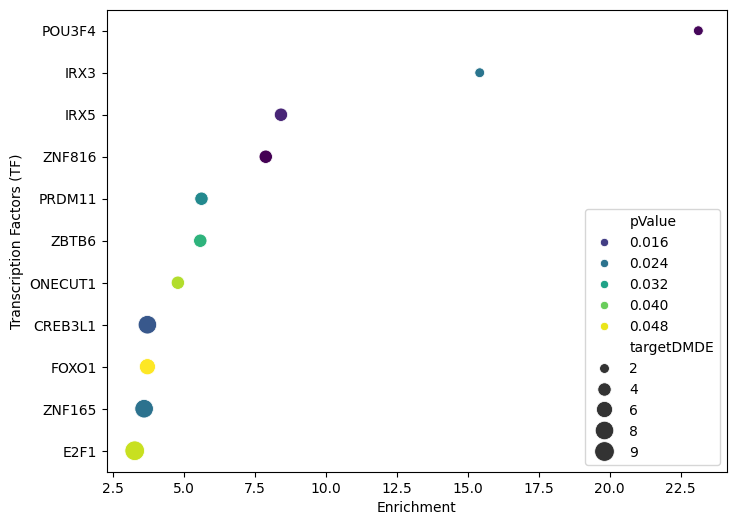

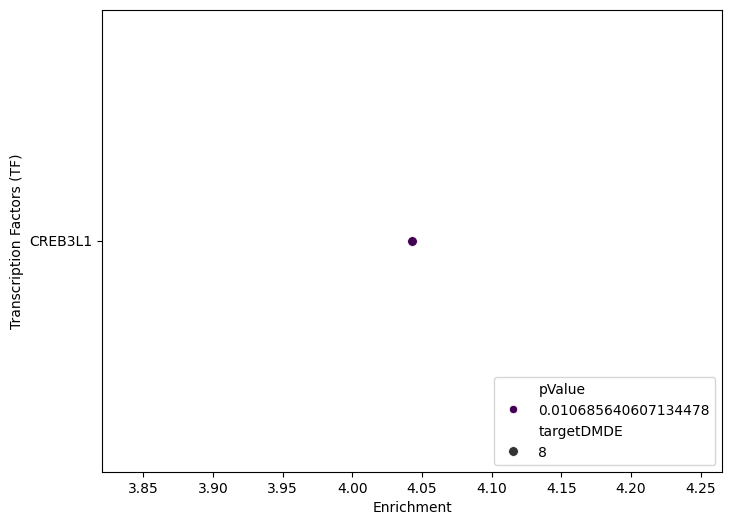

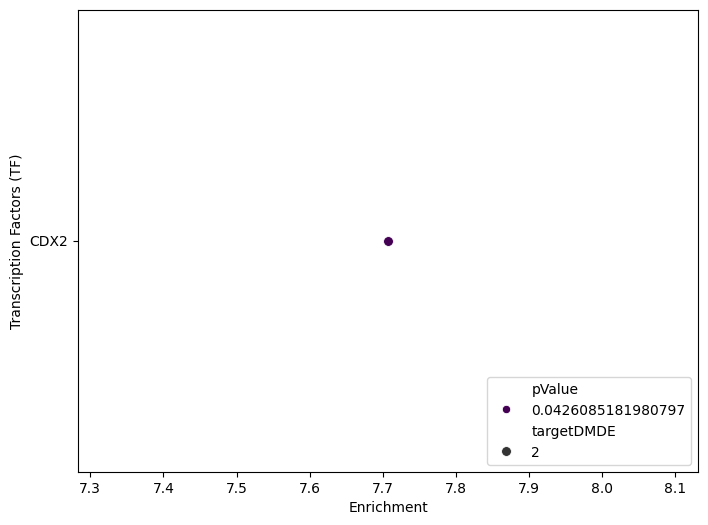

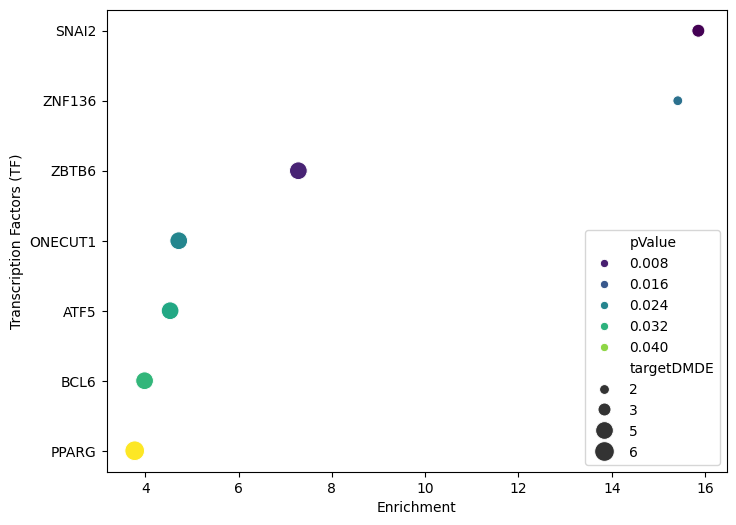

In [52]:
plot_enrichment(expected_down_enrichment_iPSC, enrichment_threshold=1)
plot_enrichment(expected_down_enrichment_iMeLC, enrichment_threshold=1)
plot_enrichment(expected_down_enrichment_PG, enrichment_threshold=1)
plot_enrichment(expected_down_enrichment_EG, enrichment_threshold=1)

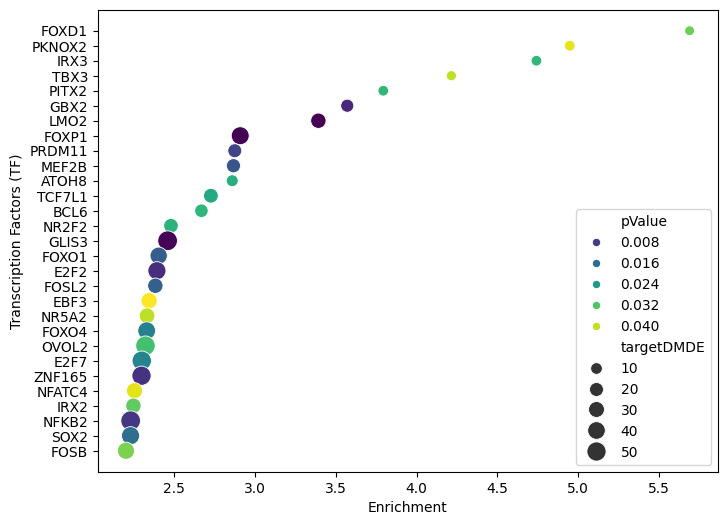

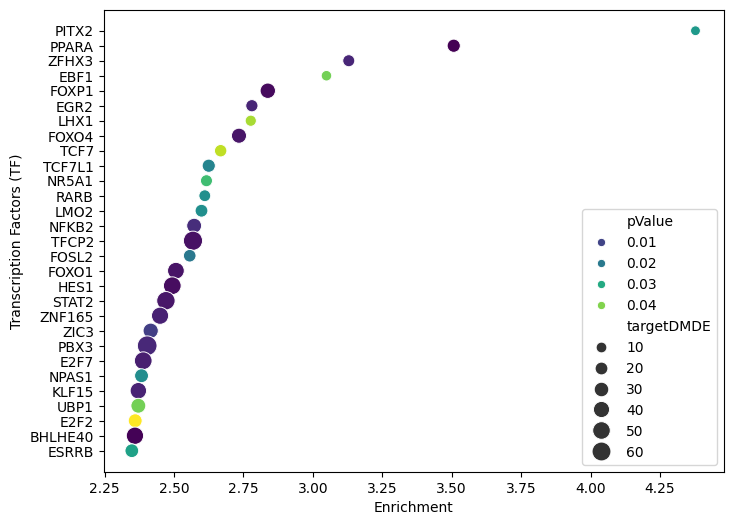

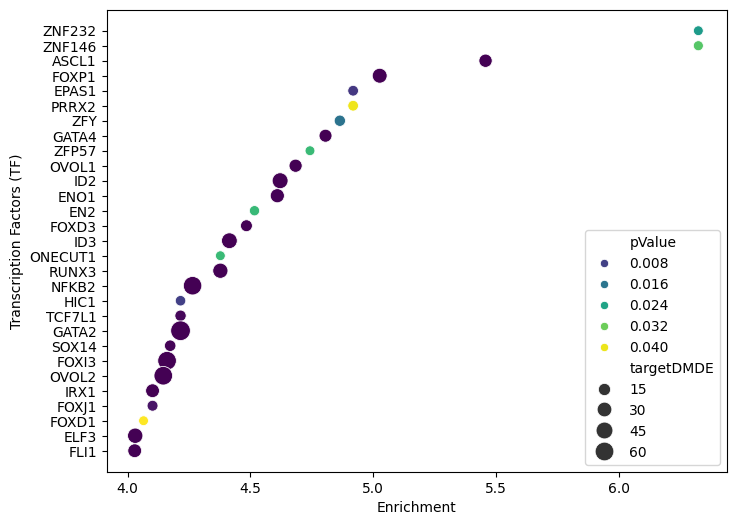

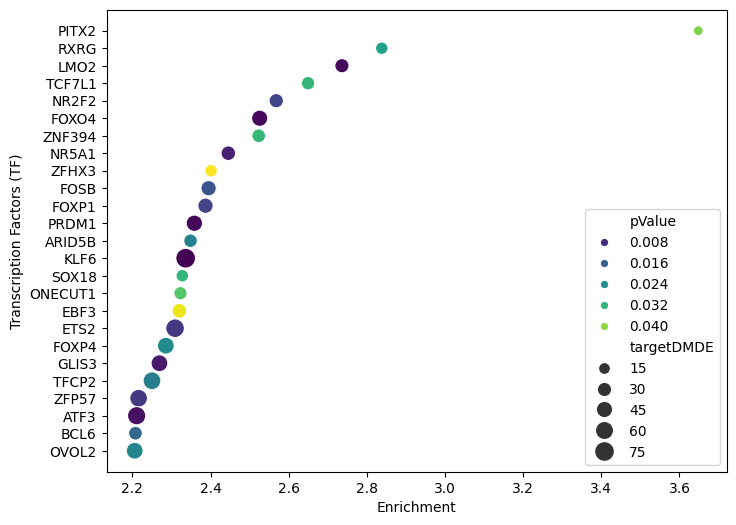

In [53]:
plot_enrichment(expected_all_enrichment_iPSC, enrichment_threshold=2.2)
plot_enrichment(expected_all_enrichment_iMeLC, enrichment_threshold=2.3)
plot_enrichment(expected_all_enrichment_PG, enrichment_threshold=4)
plot_enrichment(expected_all_enrichment_EG, enrichment_threshold=2.2)

/tmp/ipykernel_3576080/4072407312.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


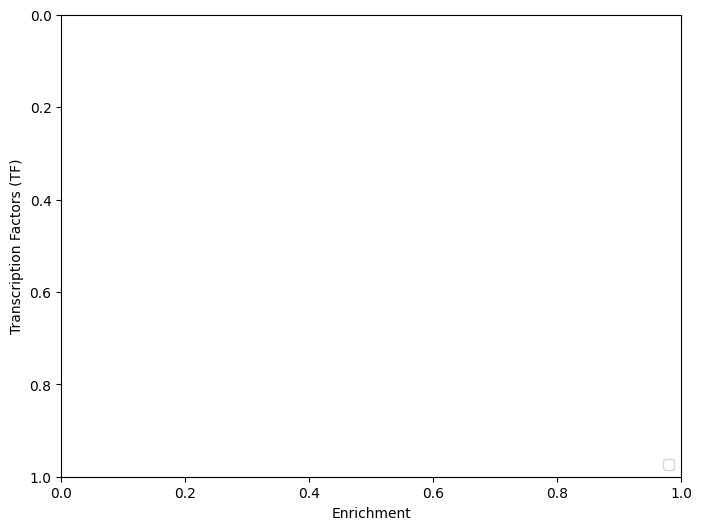

/tmp/ipykernel_3576080/4072407312.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


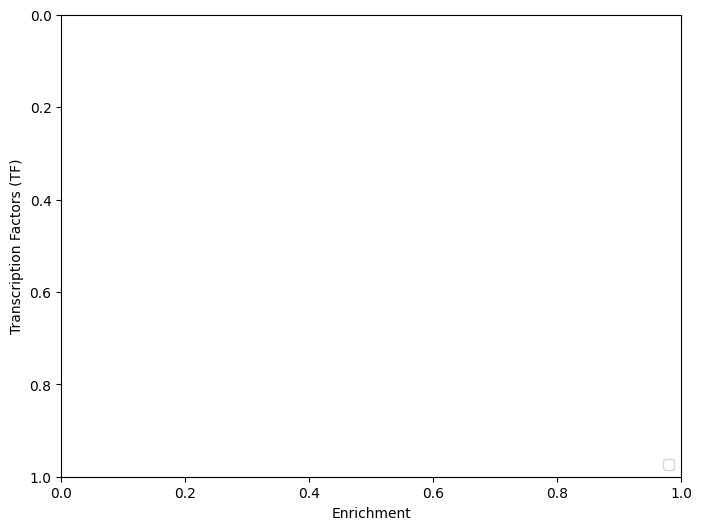

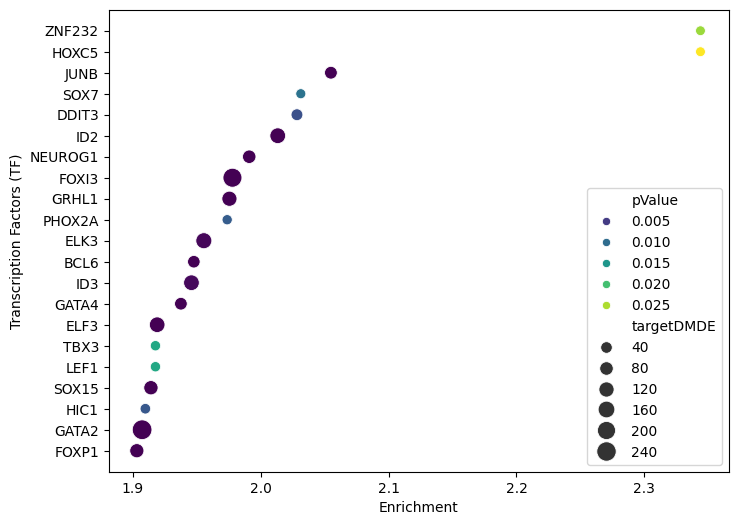

/tmp/ipykernel_3576080/4072407312.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


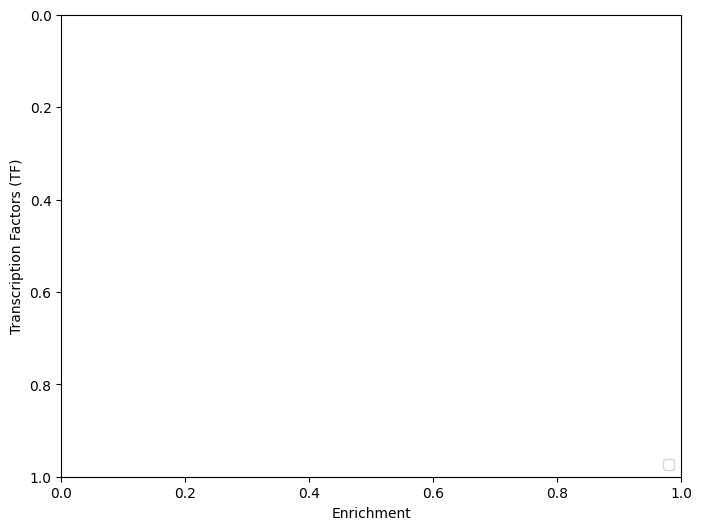

In [54]:
plot_enrichment(expected_up2_enrichment_iPSC, enrichment_threshold=1)
plot_enrichment(expected_up2_enrichment_iMeLC, enrichment_threshold=1)
plot_enrichment(expected_up2_enrichment_PG, enrichment_threshold=1.9)
plot_enrichment(expected_up2_enrichment_EG, enrichment_threshold=1)

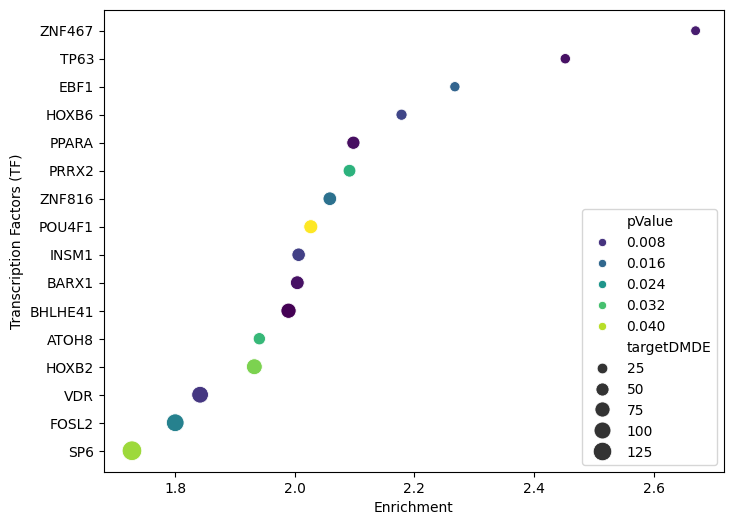

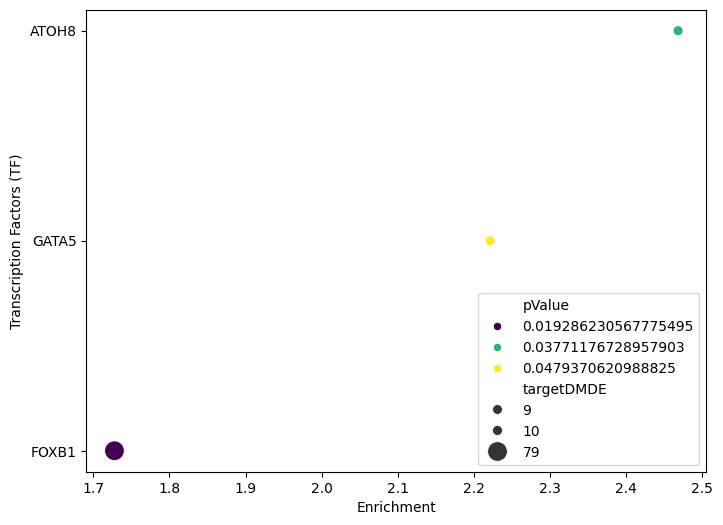

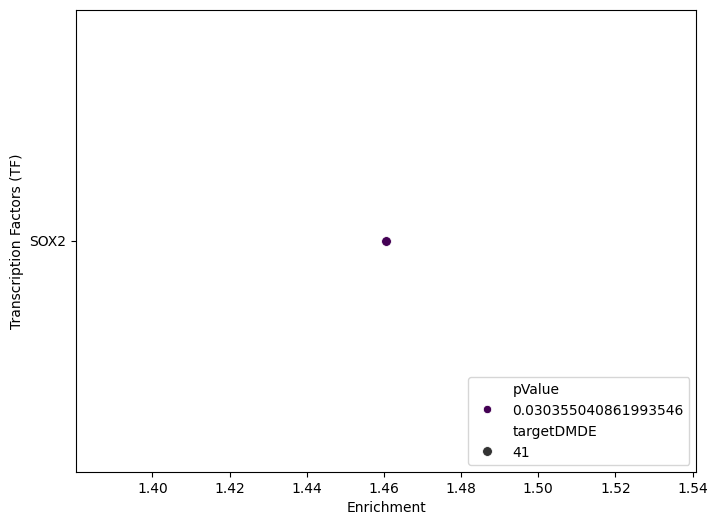

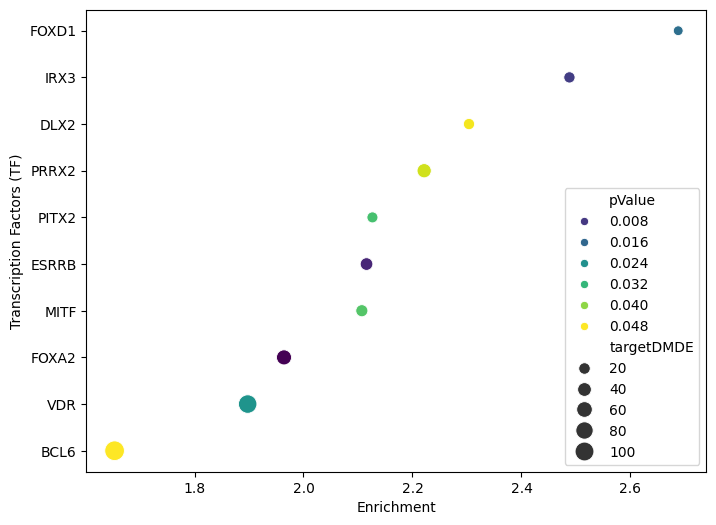

In [55]:
plot_enrichment(expected_down2_enrichment_iPSC, enrichment_threshold=1)
plot_enrichment(expected_down2_enrichment_iMeLC, enrichment_threshold=1)
plot_enrichment(expected_down2_enrichment_PG, enrichment_threshold=1)
plot_enrichment(expected_down2_enrichment_EG, enrichment_threshold=1)

/tmp/ipykernel_3576080/4072407312.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


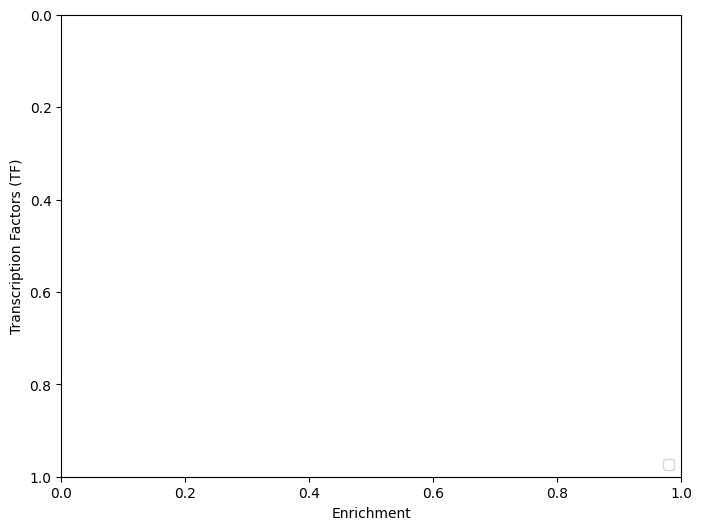

/tmp/ipykernel_3576080/4072407312.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


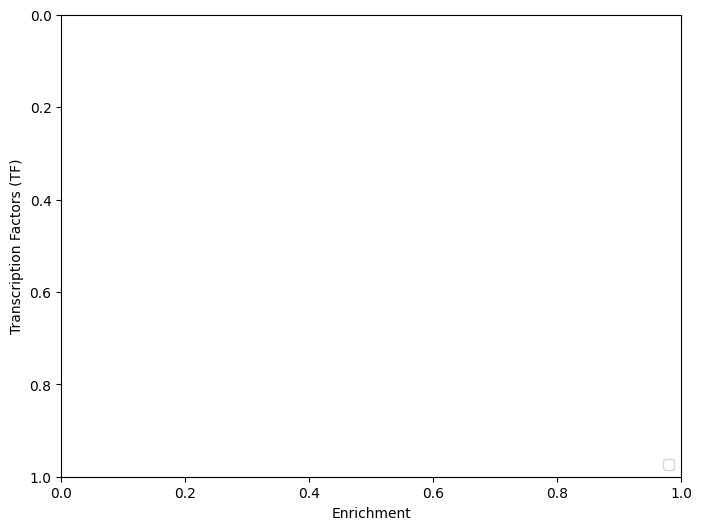

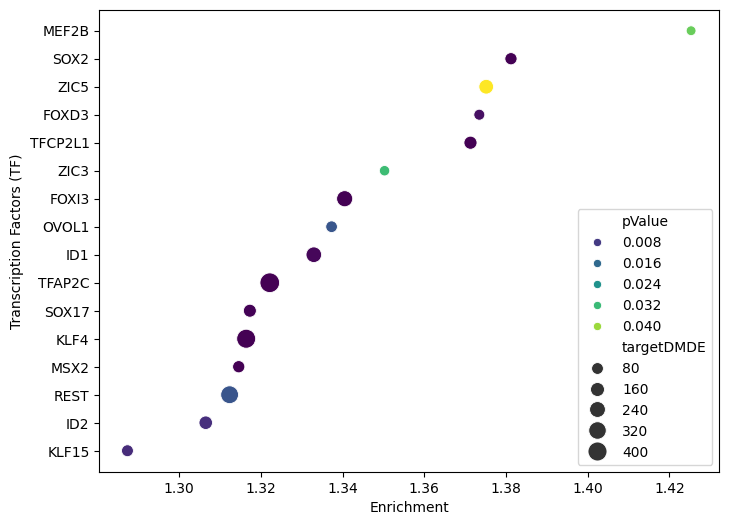

/tmp/ipykernel_3576080/4072407312.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


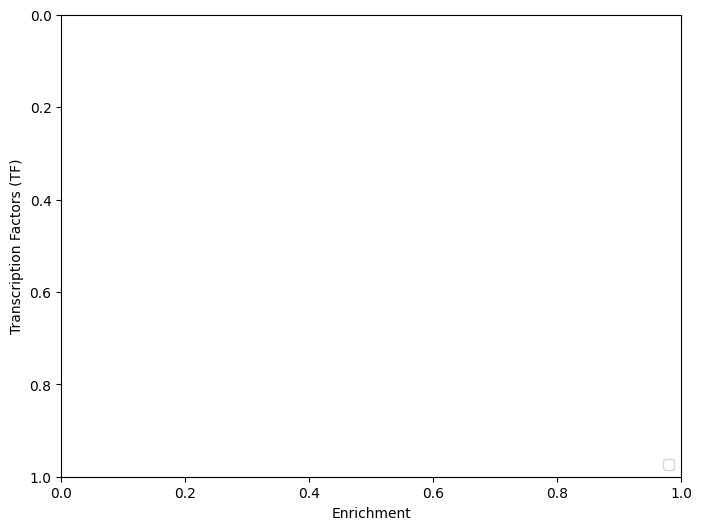

In [56]:
plot_enrichment(expected_all2_enrichment_iPSC, enrichment_threshold=1)
plot_enrichment(expected_all2_enrichment_iMeLC, enrichment_threshold=1)
plot_enrichment(expected_all2_enrichment_PG, enrichment_threshold=1)
plot_enrichment(expected_all2_enrichment_EG, enrichment_threshold=1)

#### Sorted by pvlaue

In [57]:
def plot_pvalue(df, pvalue_threshold, size_col='targetDMDE', figsize=(8, 6)):

    enrichment_filt = df[df['pValue'] < pvalue_threshold]

    enrichment_filt = enrichment_filt.sort_values(by='pValue', ascending=True)

    enrichment_filt['TF'] = pd.Categorical(enrichment_filt['TF'], categories=enrichment_filt['TF'].unique(), ordered=True)

    plt.figure(figsize=figsize)

    dotplot = sns.scatterplot(
        x='pValue', 
        y='TF',
        hue='enrichment', 
        size=size_col,
        data=enrichment_filt,
        palette='viridis',
        sizes=(50, 200),
        legend=True
    )

    plt.xlabel('pValue')
    plt.ylabel('Transcription Factors (TF)')
    plt.legend(loc='upper right', prop={'size': 10})
    plt.show()

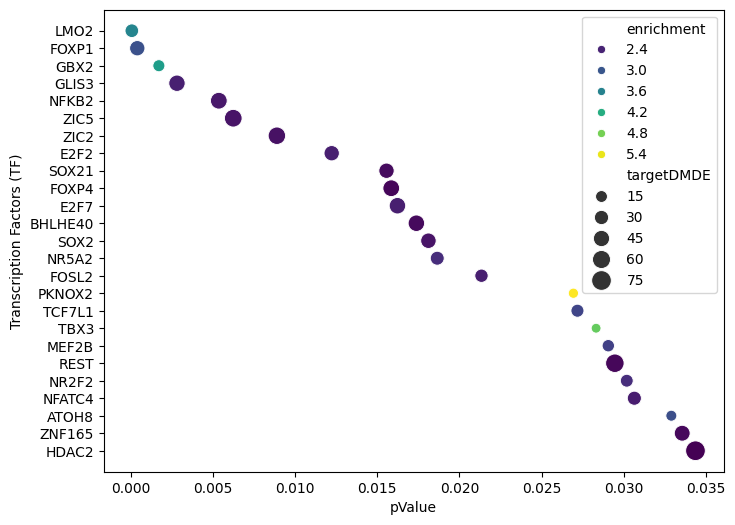

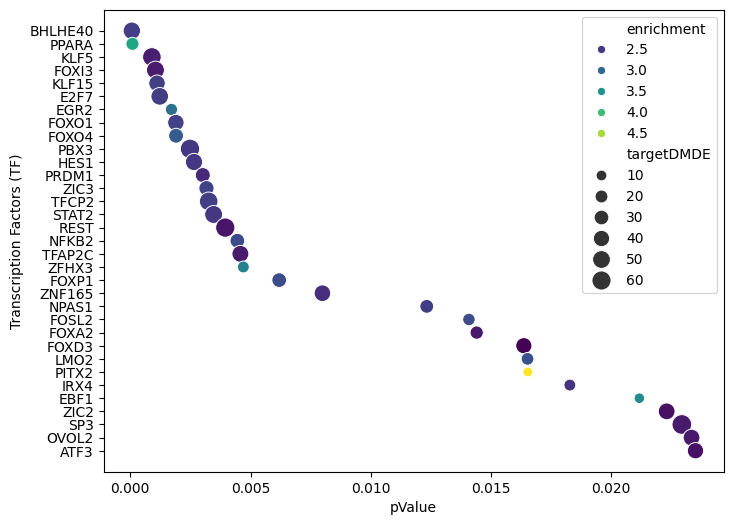

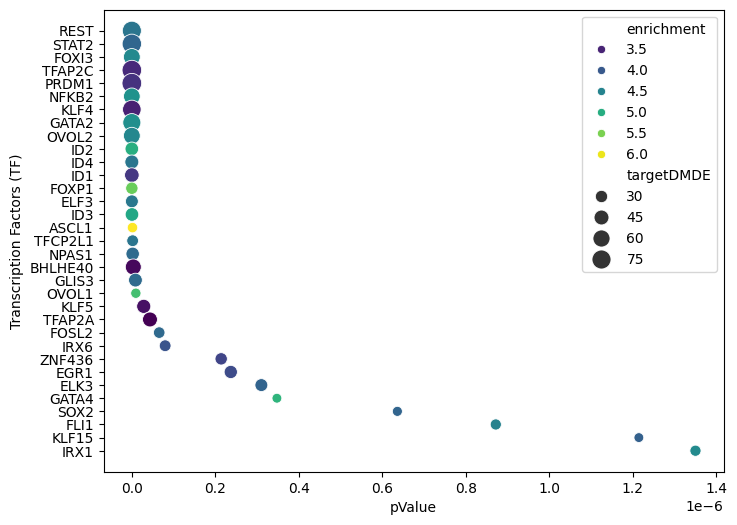

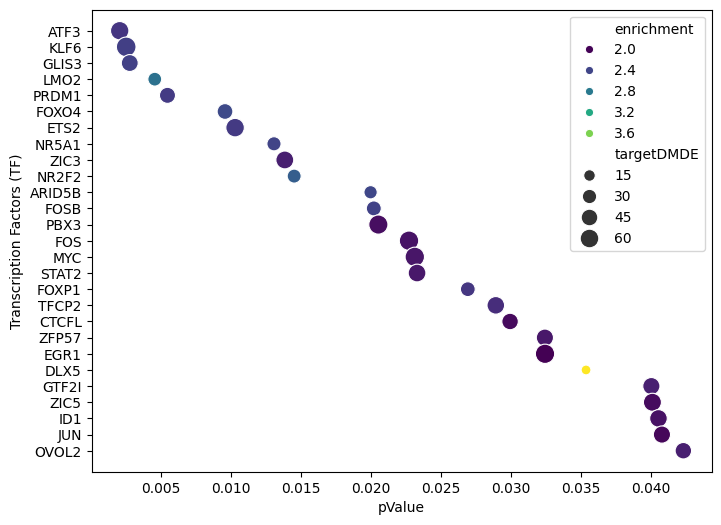

In [58]:
plot_pvalue(expected_up_enrichment_iPSC, pvalue_threshold=0.04)
plot_pvalue(expected_up_enrichment_iMeLC, pvalue_threshold=0.025)
plot_pvalue(expected_up_enrichment_PG, pvalue_threshold=0.0000015)
plot_pvalue(expected_up_enrichment_EG, pvalue_threshold=0.045)

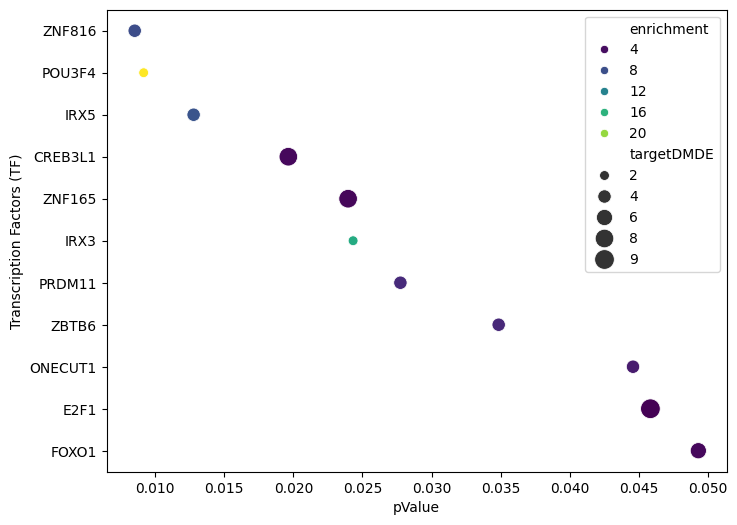

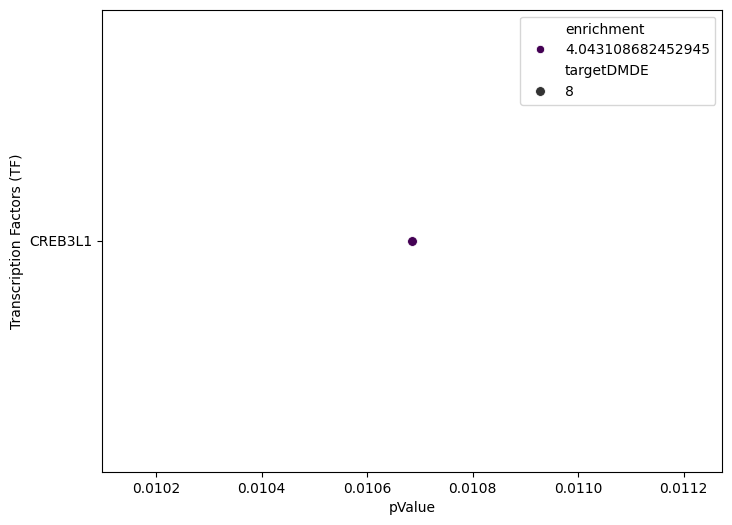

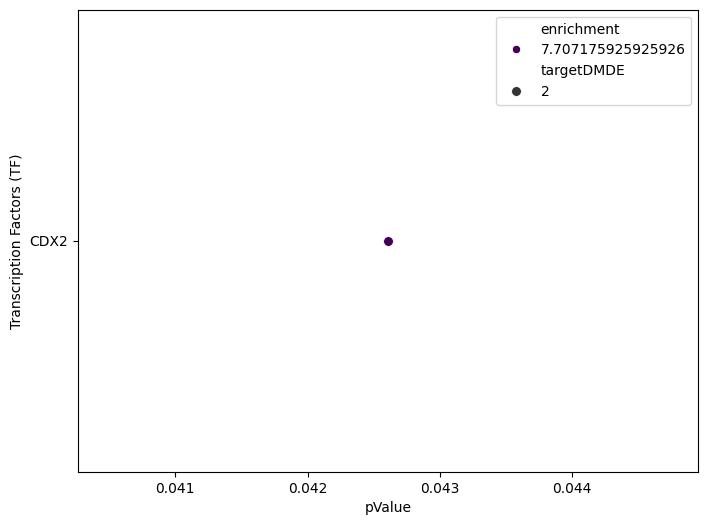

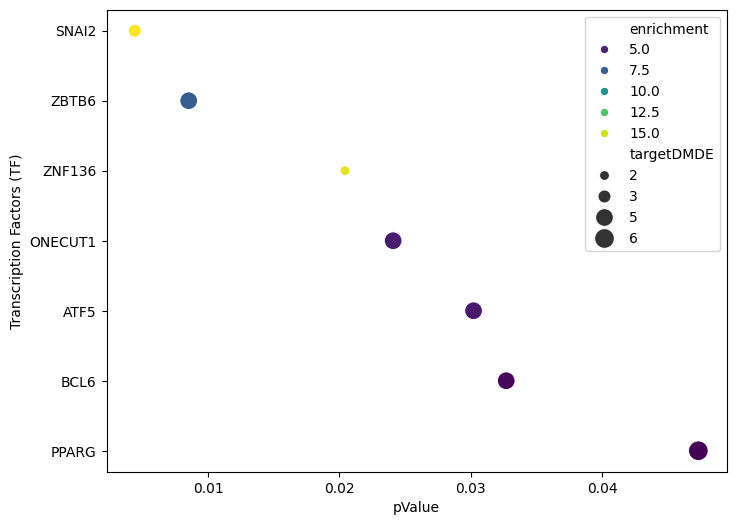

In [59]:
plot_pvalue(expected_down_enrichment_iPSC, pvalue_threshold=1)
plot_pvalue(expected_down_enrichment_iMeLC, pvalue_threshold=1)
plot_pvalue(expected_down_enrichment_PG, pvalue_threshold=1)
plot_pvalue(expected_down_enrichment_EG, pvalue_threshold=1)

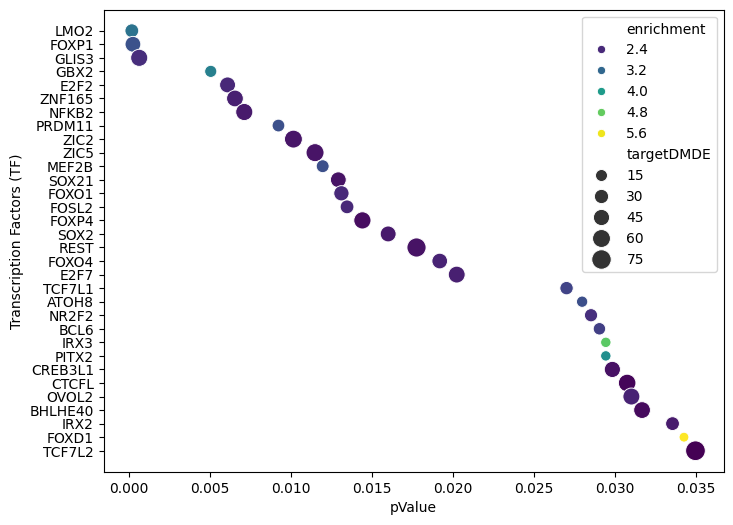

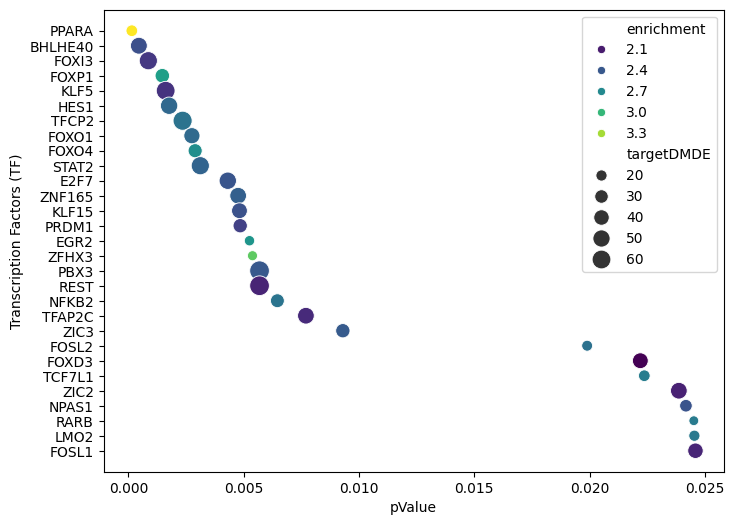

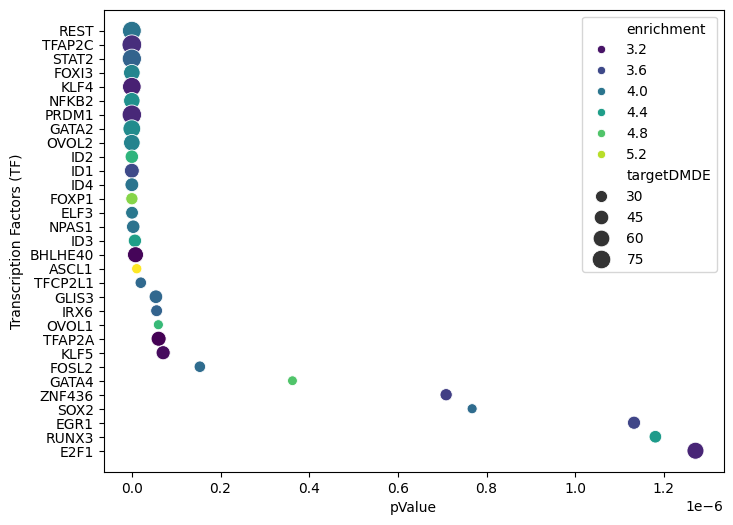

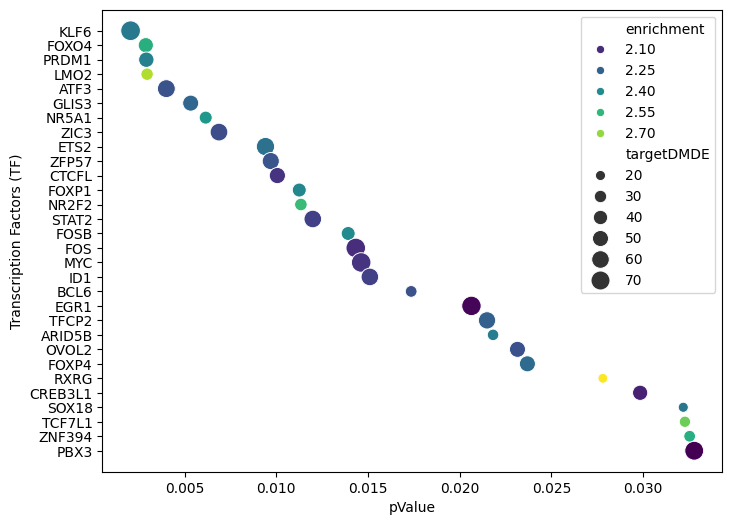

In [60]:
plot_pvalue(expected_all_enrichment_iPSC, pvalue_threshold=0.035)
plot_pvalue(expected_all_enrichment_iMeLC, pvalue_threshold=0.025)
plot_pvalue(expected_all_enrichment_PG, pvalue_threshold=0.0000015)
plot_pvalue(expected_all_enrichment_EG, pvalue_threshold=0.035)

/tmp/ipykernel_3576080/3428210524.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


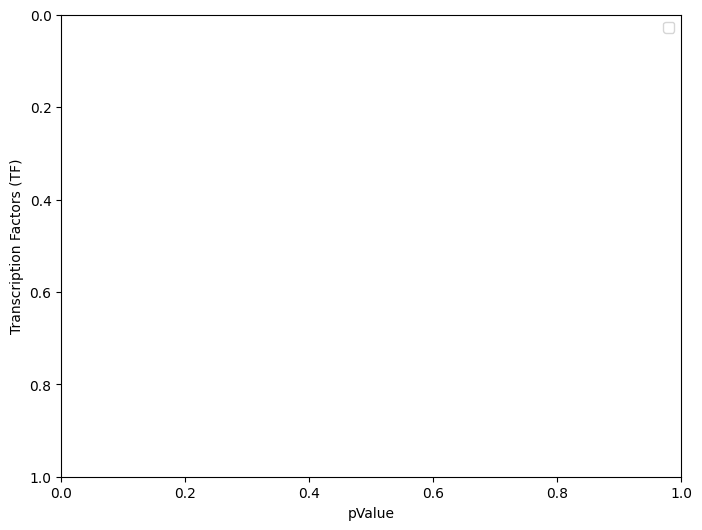

/tmp/ipykernel_3576080/3428210524.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


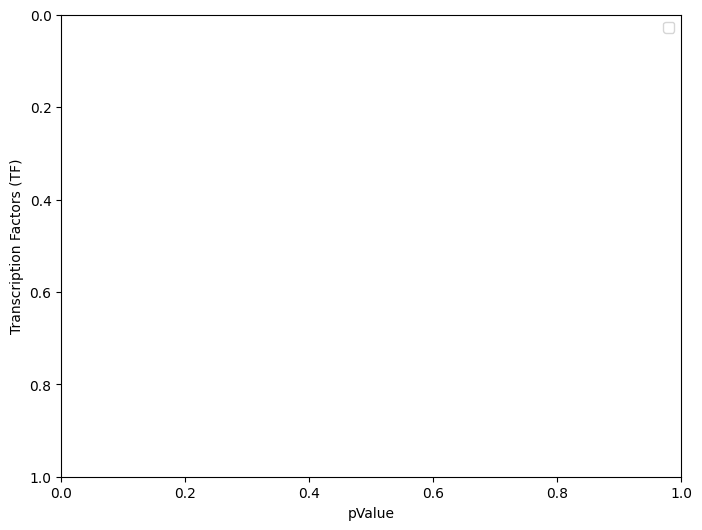

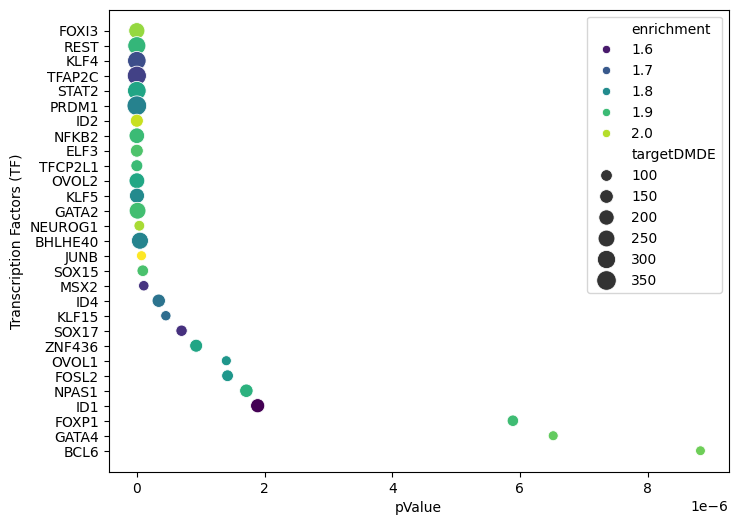

/tmp/ipykernel_3576080/3428210524.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


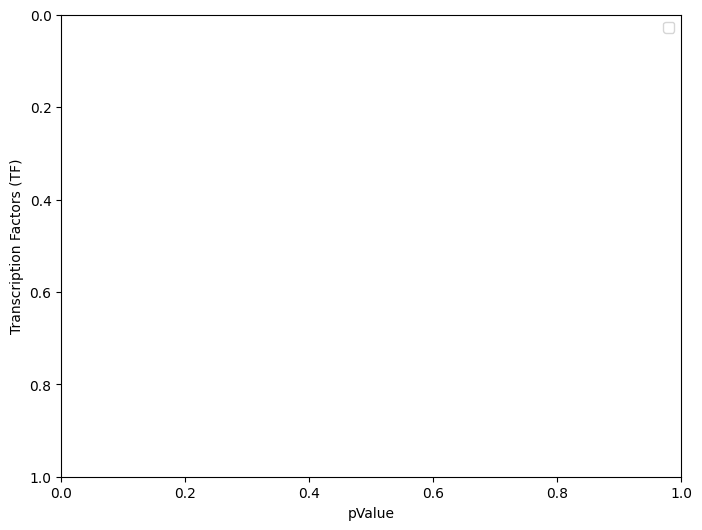

In [61]:
plot_pvalue(expected_up2_enrichment_iPSC, pvalue_threshold=0.05)
plot_pvalue(expected_up2_enrichment_iMeLC, pvalue_threshold=0.05)
plot_pvalue(expected_up2_enrichment_PG, pvalue_threshold=0.00001)
plot_pvalue(expected_up2_enrichment_EG, pvalue_threshold=0.05)

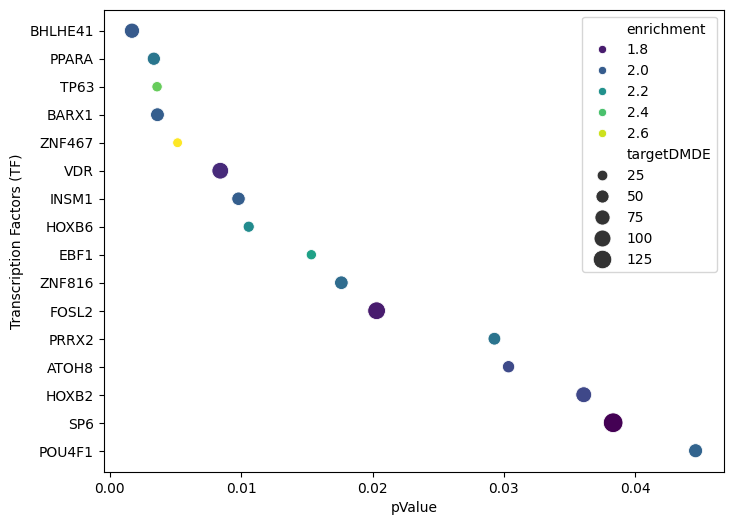

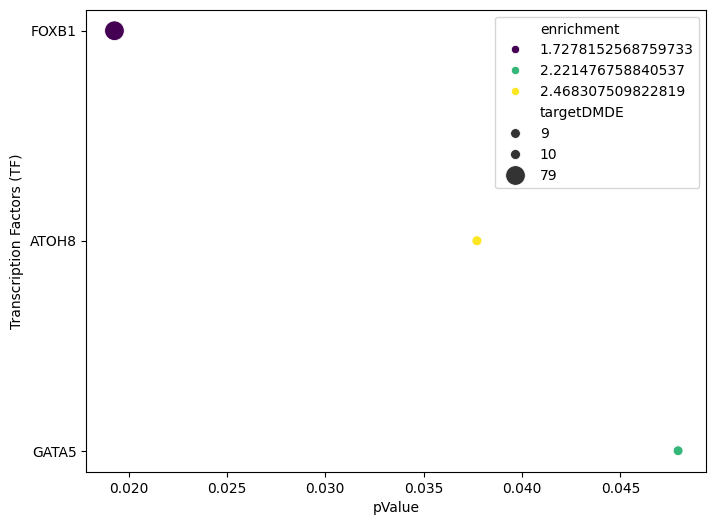

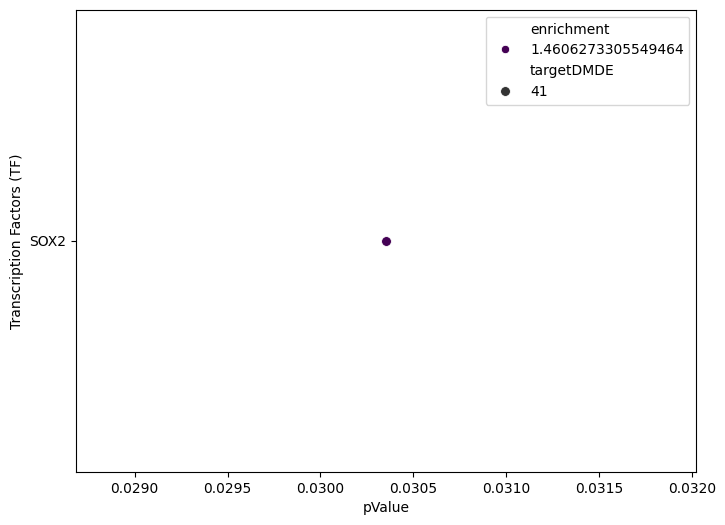

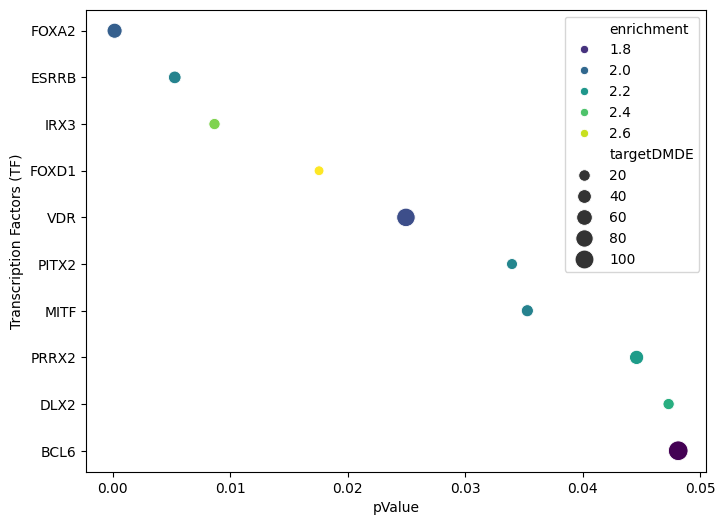

In [62]:
plot_pvalue(expected_down2_enrichment_iPSC, pvalue_threshold=1)
plot_pvalue(expected_down2_enrichment_iMeLC, pvalue_threshold=1)
plot_pvalue(expected_down2_enrichment_PG, pvalue_threshold=1)
plot_pvalue(expected_down2_enrichment_EG, pvalue_threshold=1)

/tmp/ipykernel_3576080/3428210524.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


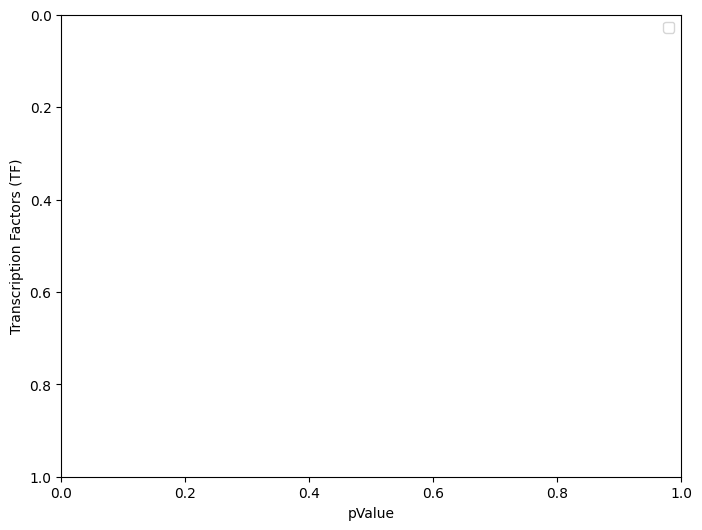

/tmp/ipykernel_3576080/3428210524.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


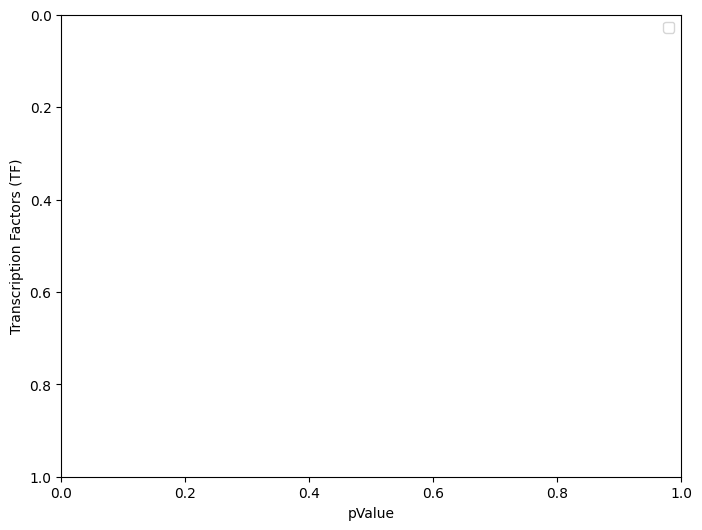

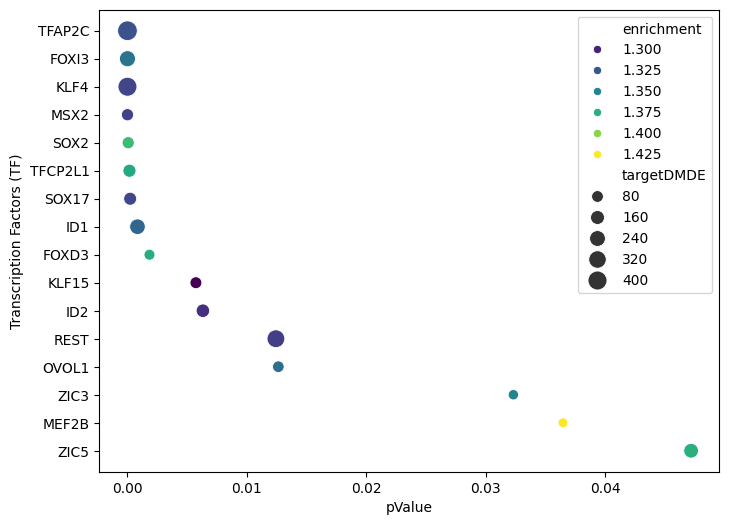

/tmp/ipykernel_3576080/3428210524.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  dotplot = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


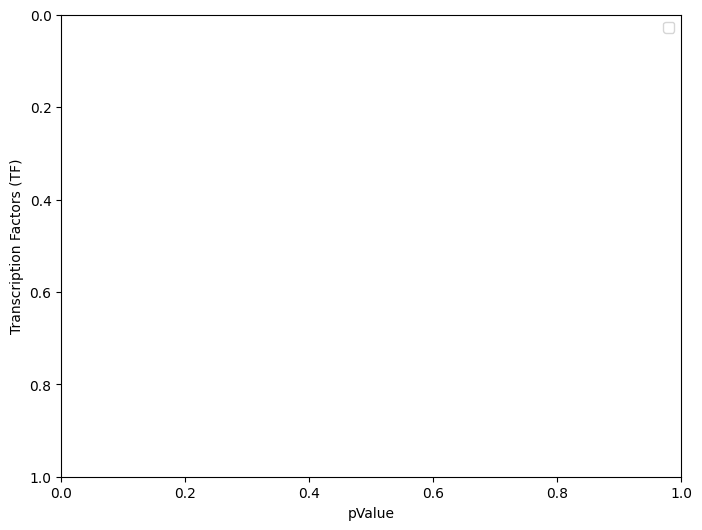

In [63]:
plot_pvalue(expected_all2_enrichment_iPSC, pvalue_threshold=0.05)
plot_pvalue(expected_all2_enrichment_iMeLC, pvalue_threshold=0.05)
plot_pvalue(expected_all2_enrichment_PG, pvalue_threshold=0.05)
plot_pvalue(expected_all2_enrichment_EG, pvalue_threshold=0.05)

#### TFs DMDE analysis

In [68]:
commonTF_expected_down_GRNiPSC

{'ZIC5'}

In [69]:
commonTF_expected_all_GRNiPSC

{'ELF3',
 'ELK3',
 'EZH2',
 'FOXP1',
 'GATA3',
 'LMO2',
 'MSX2',
 'OVOL2',
 'PRDM14',
 'PRRX2',
 'RARB',
 'TCF7',
 'ZIC5'}

In [70]:
TF_dmde_grn = GRN_iPSC[GRN_iPSC['source'].isin(commonTF_expected_all_GRNiPSC)]
TF_dmde_grn

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
29,29,ELF3,A4GALT,0.013303,0.013303,5.879207e-13,12.230681
53,53,LMO2,A4GALT,0.017735,0.017735,1.102182e-13,12.957747
56,56,OVOL2,A4GALT,0.001903,0.001903,1.500717e-03,2.823701
90,90,ZIC5,A4GALT,0.013395,0.013395,1.373494e-07,6.862173
105,105,GATA3,A4GALT,0.000290,0.000290,4.910657e-01,0.308860
...,...,...,...,...,...,...,...
350371,350371,GATA3,ZSWIM7,-0.006067,0.006067,8.498659e-06,5.070650
350404,350404,EZH2,ZYG11A,-0.007923,0.007923,5.477281e-05,4.261435
350427,350427,OVOL2,ZYG11A,0.007120,0.007120,3.897634e-09,8.409199
350456,350456,ZIC5,ZYG11A,-0.005095,0.005095,6.957498e-05,4.157547


In [71]:
TFdmde_target = TF_dmde_grn.groupby('source')['target'].nunique()
TFdmde_target_name = TF_dmde_grn.groupby('source')['target'].unique()
TFdmde_target

source
ELF3      1789
ELK3      1576
EZH2       435
FOXP1     1112
GATA3     2424
LMO2      1177
MSX2       762
OVOL2     2280
PRDM14     485
PRRX2      432
RARB      1187
TCF7       684
ZIC5      2315
Name: target, dtype: int64

In [72]:
TFasTargets = TF_dmde_grn[TF_dmde_grn['target'].isin(TF_GRNiPSC)]
TFdmde_TF = TFasTargets.groupby('source')['target'].nunique()
TFdmde_TF

source
ELF3      149
ELK3      125
EZH2       42
FOXP1      86
GATA3     178
LMO2       93
MSX2       65
OVOL2     184
PRDM14     40
PRRX2      47
RARB       97
TCF7       64
ZIC5      187
Name: target, dtype: int64

In [73]:
TFdmde_TF_list = TFasTargets.groupby('source')['target'].unique()
TFdmde_TF_list

source
ELF3      [AFP, AIRE, ALX3, ARID5B, ATF3, ATF5, ATOH1, A...
ELK3      [AFP, AIRE, ARID5B, ATF3, ATOH1, ATOH8, BCL6, ...
EZH2      [ATF3, BCL6, CREB3L1, DDIT3, DLX1, E2F7, FEZF1...
FOXP1     [ARID5B, ATF3, ATOH8, BCL6, CREB3L1, CREB3L3, ...
GATA3     [AFP, AIRE, ALX3, ARID5B, ATF3, ATOH1, ATOH8, ...
LMO2      [AIRE, ATF3, ATOH8, BCL3, CREB3L1, CREB3L3, CT...
MSX2      [AFP, ALX3, ARID5B, ATF3, ATOH8, BCL6, BHLHE40...
OVOL2     [AIRE, ALX3, ARNT2, ATF3, ATOH1, ATOH8, BCL3, ...
PRDM14    [ALX3, ATF3, ATOH8, EBF3, EGR1, FOSL1, FOSL2, ...
PRRX2     [ALX3, ARID5B, ATOH8, BCL6, CREB3L1, DLX1, DLX...
RARB      [ARNT2, ATF3, ATOH8, BCL3, BCL6, BHLHE40, CREB...
TCF7      [AIRE, ATF3, CREB3L1, DDIT3, EGR1, EGR2, ELF3,...
ZIC5      [AIRE, ALX3, ARNT2, ATF3, ATOH1, ATOH8, BCL3, ...
Name: target, dtype: object

In [74]:
ExpectedasTargets = TF_dmde_grn[TF_dmde_grn['target'].isin(expected_all)]
TFdmde_expected = ExpectedasTargets.groupby('source')['target'].nunique()
TFdmde_expected

source
ELF3      105
ELK3       80
EZH2       22
FOXP1      75
GATA3     148
LMO2       80
MSX2       42
OVOL2     131
PRDM14     26
PRRX2      23
RARB       77
TCF7       44
ZIC5      132
Name: target, dtype: int64

In [75]:
TFdmde_expected_list = ExpectedasTargets.groupby('source')['target'].unique()
TFdmde_expected_list

source
ELF3      [A4GALT, ACADL, ADGRD1, ANK1, ANO2, APLNR, ARH...
ELK3      [ANK1, ANO2, APLNR, ARHGAP8, ATRNL1, BCAR3, BI...
EZH2      [ANK1, ANO2, B3GNT2, ENPP2, EPHB3, HSPA8, ITM2...
FOXP1     [ANO2, BCAR3, BIN1, BMPR1A, CAPN2, CDO1, COL17...
GATA3     [A4GALT, ABCA4, ACADL, ADGRD1, ANK1, ANO2, AQP...
LMO2      [A4GALT, ANK1, ANO2, ATRNL1, AUTS2, B3GNT2, BM...
MSX2      [CDO1, ELK3, EZH2, FAM174B, FN1, FNDC4, FOXP1,...
OVOL2     [A4GALT, ACADL, ADGRD1, ANK1, ANO2, ARHGAP8, A...
PRDM14    [ANO2, BCAR3, DRAXIN, FN1, FXYD3, GPRC5B, IL6R...
PRRX2     [ANO2, CDO1, COL17A1, EFEMP1, ELK3, EPHB3, EZH...
RARB      [ABCA4, ANO2, APLNR, AXIN2, B3GNT2, BCAR3, BIN...
TCF7      [ADGRD1, ATRNL1, AXIN2, B3GNT2, CDO1, CSF3R, E...
ZIC5      [A4GALT, ACADL, ANK1, ANO2, ARHGAP8, ATRNL1, A...
Name: target, dtype: object

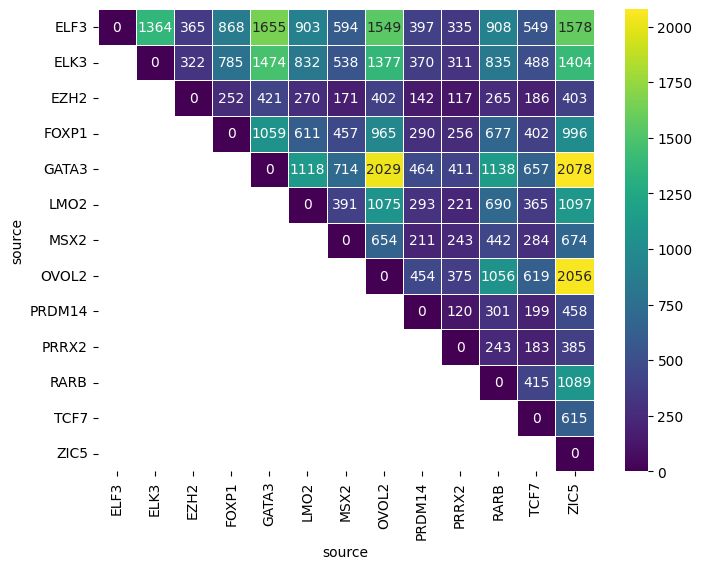

In [76]:
all_targets = set()
for targets in TFdmde_target_name:
    all_targets.update(targets)

all_targets = list(all_targets)

presence_matrix = pd.DataFrame(0, index=all_targets, columns=TFdmde_target_name.index)

for tf in TFdmde_target_name.index:
    presence_matrix[tf] = presence_matrix.index.isin(TFdmde_target_name[tf]).astype(int)

intersection_matrix = pd.DataFrame(np.zeros((len(TFdmde_target_name.index), len(TFdmde_target_name.index))), index=TFdmde_target_name.index, columns=TFdmde_target_name.index)

for tf1, tf2 in combinations(TFdmde_target_name.index, 2):
    common_targets = (presence_matrix[tf1] & presence_matrix[tf2]).sum()
    intersection_matrix.loc[tf1, tf2] = common_targets
    intersection_matrix.loc[tf2, tf1] = common_targets

mask = np.tril(np.ones_like(intersection_matrix, dtype=bool), k=-1)

plt.figure(figsize=(8, 6))
sns.heatmap(intersection_matrix, annot=True, cmap='viridis', mask=mask, fmt='g', linewidths=.5)
plt.show()

/tmp/ipykernel_3576080/2558451435.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_count_by_tf.index, y=target_count_by_tf.values, palette='viridis')


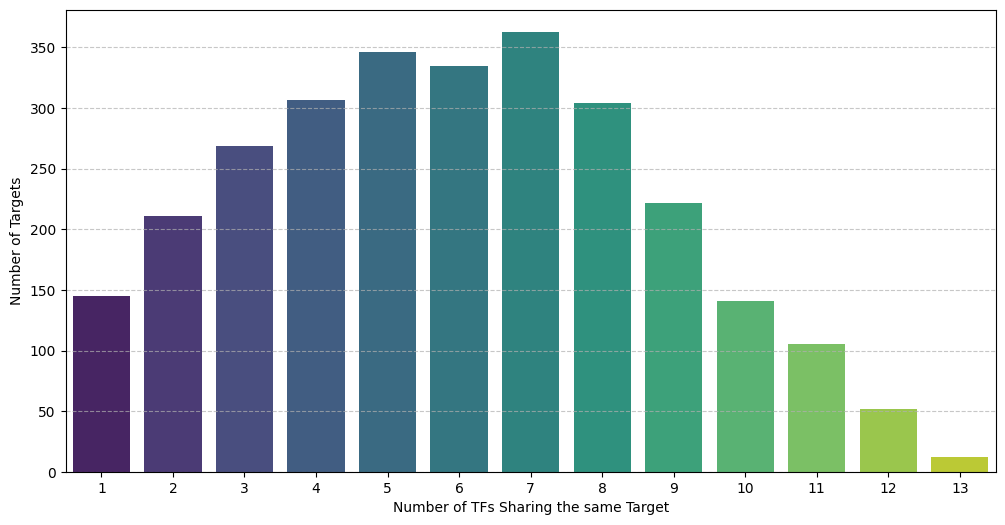

In [77]:
target_shares = presence_matrix.sum(axis=1)

filtered_target_shares = target_shares[target_shares >= 1]

target_count_by_tf = filtered_target_shares.value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=target_count_by_tf.index, y=target_count_by_tf.values, palette='viridis')
plt.xlabel('Number of TFs Sharing the same Target')
plt.ylabel('Number of Targets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [78]:
common_targets = presence_matrix[presence_matrix.sum(axis=1) == len(TFdmde_target_name.index)]

shared_targets = common_targets.index.tolist()

print("Targets shared by all 13 TFs:")
print(shared_targets)

Targets shared by all 13 TFs:
['ZFHX2', 'DCAF11', 'PLA2G3', 'ENO2', 'RNF220', 'YPEL3', 'FOXP4', 'TFEB', 'PCDHB5', 'OTX2', 'PHLDB1', 'ACIN1']


#### Enrichment 13 TFs

In [79]:
DE_universe = pd.read_excel("edgeR_results.xlsx")

In [80]:
DE_universe

,Unnamed: 0,logFC.celltypes_leveledhEGCLC,logFC.celltypes_leveledhPGCLC,logFC.celltypes_levelediMeLC,logCPM,LR,PValue,FDR
0,AHNAK,12.040376,16.812560,12.702891,6.819067,2650.513617,0.000000,0.000000
1,TCL1A,11.390463,17.657546,0.000000,7.638238,3871.022212,0.000000,0.000000
2,ARID5B,11.237896,15.711110,0.000000,5.602953,2040.849486,0.000000,0.000000
3,DLL1,-11.212241,3.561523,-11.212241,4.571846,1551.104568,0.000000,0.000000
4,ALOX5,-11.162451,4.423817,-11.162451,5.437250,2265.240747,0.000000,0.000000
...,...,...,...,...,...,...,...,...
12170,NSFL1C,0.027774,-0.006785,-0.001546,7.090194,0.079787,0.994147,0.994474
12171,INTS4,-0.023568,0.002614,0.019111,6.145675,0.056055,0.996529,0.996775
12172,COA3,0.006039,0.030217,0.015463,6.922481,0.050343,0.997041,0.997205
12173,HPF1,-0.030257,-0.002054,-0.034149,4.989105,0.045044,0.997492,0.997573


In [81]:
DE_universe_genes = DE_universe['Unnamed: 0'].unique().tolist()
len(DE_universe_genes)

12175

In [82]:
DM_universe = pyreadr.read_r('GeneUniverse.rds')

In [83]:
DM_universe

OrderedDict([(None,
                    ensembl_gene_id_version  ensembl_gene_id  hgnc_symbol  \
              0           ENSG00000223972.5  ENSG00000223972      DDX11L1   
              1           ENSG00000278267.1  ENSG00000278267    MIR6859-1   
              2           ENSG00000243485.5  ENSG00000243485  MIR1302-2HG   
              3           ENSG00000237613.2  ENSG00000237613      FAM138A   
              4           ENSG00000186092.6  ENSG00000186092        OR4F5   
              ...                       ...              ...          ...   
              36011       ENSG00000188399.5  ENSG00000188399    ANKRD36P1   
              36012       ENSG00000215506.5  ENSG00000215506      TPTE2P4   
              36013       ENSG00000231514.1  ENSG00000231514       CCNQP2   
              36014       ENSG00000237917.1  ENSG00000237917      PARP4P1   
              36015       ENSG00000235857.1  ENSG00000235857      CTBP2P1   
              
                                         

In [84]:
DM_universe = OrderedDict(DM_universe)

In [85]:
DM_universe = list(DM_universe.values())[0]
DM_universe

,ensembl_gene_id_version,ensembl_gene_id,hgnc_symbol,gene_biotype,entrez_gene_id
0,ENSG00000223972.5,ENSG00000223972,DDX11L1,transcribed_unprocessed_pseudogene,100287102
1,ENSG00000278267.1,ENSG00000278267,MIR6859-1,miRNA,102466751
2,ENSG00000243485.5,ENSG00000243485,MIR1302-2HG,lncRNA,107985730
3,ENSG00000237613.2,ENSG00000237613,FAM138A,lncRNA,645520
4,ENSG00000186092.6,ENSG00000186092,OR4F5,protein_coding,79501
...,...,...,...,...,...
36011,ENSG00000188399.5,ENSG00000188399,ANKRD36P1,unprocessed_pseudogene,100132420
36012,ENSG00000215506.5,ENSG00000215506,TPTE2P4,unprocessed_pseudogene,286573
36013,ENSG00000231514.1,ENSG00000231514,CCNQP2,processed_pseudogene,100421487
36014,ENSG00000237917.1,ENSG00000237917,PARP4P1,unprocessed_pseudogene,347613


In [86]:
DM_universe_genes = DM_universe['hgnc_symbol']

In [87]:
DM_universe_genes = list(DM_universe_genes)
len(DM_universe_genes)

36016

In [88]:
target_GRNiPSC = list(target_GRNiPSC)
TF_GRNiPSC = list(TF_GRNiPSC)

In [89]:
GRN_universo = set(target_GRNiPSC + TF_GRNiPSC)
len(GRN_universo)

2929

In [90]:
universo_13TFs = set(DE_universe_genes) & set(DM_universe_genes) & set(GRN_universo)
len(universo_13TFs)

2370

In [91]:
TFDMDE_enrichment_iPSC = compute_enrichment(commonTF_expected_all_GRNiPSC, GRN_iPSC_filt, universo, expected_all, p_value_threshold=0.05)
print(TFDMDE_enrichment_iPSC.sort_values(by='enrichment', ascending=False))

TFDMDE_enrichment_iMeLC = compute_enrichment(commonTF_expected_all_GRNiPSC, GRN_iMeLC_filt, universo, expected_all, p_value_threshold=0.05)
print(TFDMDE_enrichment_iMeLC.sort_values(by='enrichment', ascending=False))

TFDMDE_enrichment_PG = compute_enrichment(commonTF_expected_all_GRNiPSC, GRN_PGCLC_filt, universo, expected_all, p_value_threshold=0.05)
print(TFDMDE_enrichment_PG.sort_values(by='enrichment', ascending=False))

TFDMDE_enrichment_EG = compute_enrichment(commonTF_expected_all_GRNiPSC, GRN_EGCLC_filt, universo, expected_all, p_value_threshold=0.05)
print(TFDMDE_enrichment_EG.sort_values(by='enrichment', ascending=False))

       TF  targetTF  targetDMDE    pValue  enrichment
10   LMO2       243          27  0.000172    3.392257
0   FOXP1       457          42  0.000239    2.908042
9   OVOL2       766          52  0.031013    2.321220
6    ZIC5       874          61  0.011482    2.163107
       TF  targetTF  targetDMDE    pValue  enrichment
0   FOXP1       394          35  0.001473    2.837619
1    TCF7       222          18  0.044615    2.667869
2    RARB       163          15  0.024517    2.610758
10   LMO2       237          20  0.024541    2.598837
9   OVOL2       672          47  0.025025    2.207082
6    ZIC5       851          56  0.043164    1.963779
       TF  targetTF  targetDMDE        pValue  enrichment
0   FOXP1       158          31  1.078574e-10    5.026639
4   PRRX2        61           7  4.020857e-02    4.918540
9   OVOL2       370          59  3.788240e-15    4.145626
8    ELF3       196          34  4.298830e-10    4.031446
12   ELK3       268          33  3.612586e-06    3.704496
10  

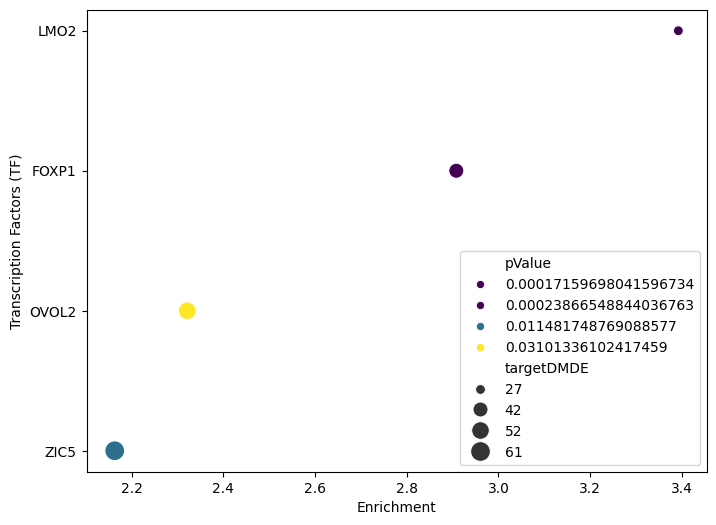

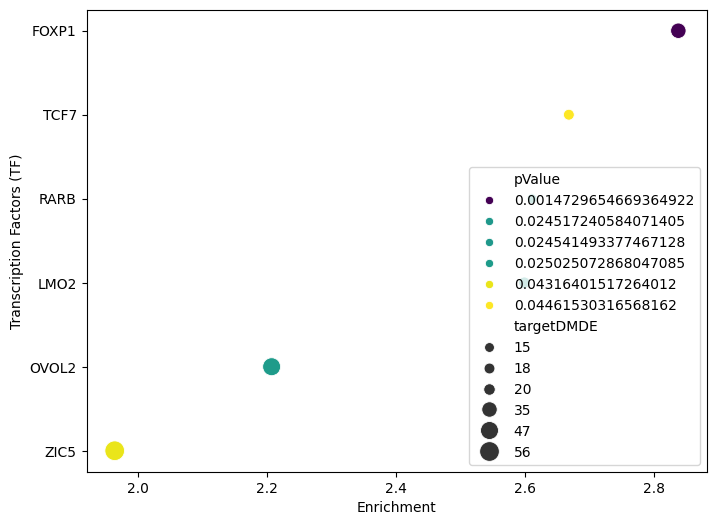

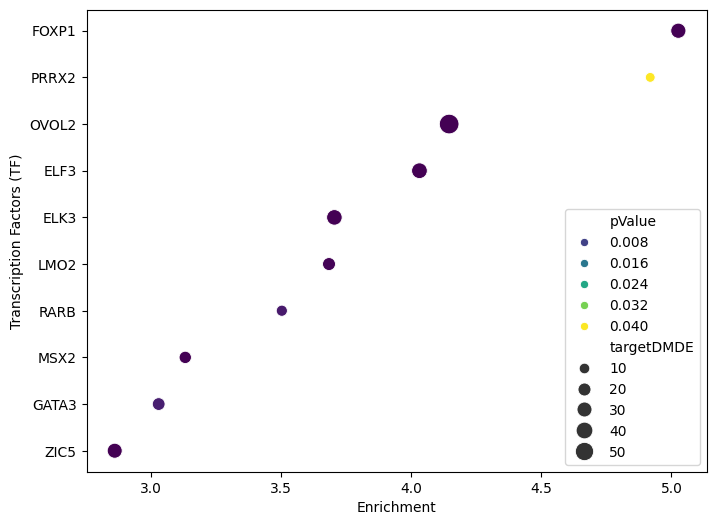

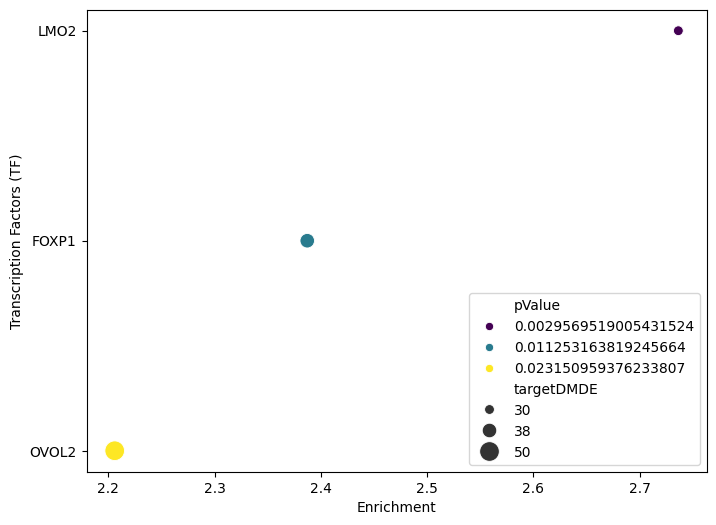

In [92]:
plot_enrichment(TFDMDE_enrichment_iPSC, enrichment_threshold=1)
plot_enrichment(TFDMDE_enrichment_iMeLC, enrichment_threshold=1)
plot_enrichment(TFDMDE_enrichment_PG, enrichment_threshold=1)
plot_enrichment(TFDMDE_enrichment_EG, enrichment_threshold=1)

In [93]:
TFDMDE_enrichment_iPSC['celltype'] = 'iPSC'
TFDMDE_enrichment_iMeLC['celltype'] = 'iMeLC'
TFDMDE_enrichment_PG['celltype'] = 'hPGCLC'
TFDMDE_enrichment_EG['celltype'] = 'hEGCLC'

TFDMDE_enrichment_iPSC['-log10(pValue)'] = -np.log10(TFDMDE_enrichment_iPSC['pValue'].replace(0, np.nan))
TFDMDE_enrichment_iMeLC['-log10(pValue)'] = -np.log10(TFDMDE_enrichment_iMeLC['pValue'].replace(0, np.nan))
TFDMDE_enrichment_PG['-log10(pValue)'] = -np.log10(TFDMDE_enrichment_PG['pValue'].replace(0, np.nan))
TFDMDE_enrichment_EG['-log10(pValue)'] = -np.log10(TFDMDE_enrichment_EG['pValue'].replace(0, np.nan))

In [94]:
TFDMDE_enrichment_combined = pd.concat([TFDMDE_enrichment_iPSC, TFDMDE_enrichment_iMeLC, TFDMDE_enrichment_PG, TFDMDE_enrichment_EG], ignore_index=True)
TFDMDE_enrichment_combined

,TF,targetTF,targetDMDE,pValue,enrichment,celltype,-log10(pValue)
0,FOXP1,457,42,2.386655e-04,2.908042,iPSC,3.622210
1,ZIC5,874,61,1.148175e-02,2.163107,iPSC,1.939992
2,OVOL2,766,52,3.101336e-02,2.321220,iPSC,1.508451
3,LMO2,243,27,1.715970e-04,3.392257,iPSC,3.765490
4,FOXP1,394,35,1.472965e-03,2.837619,iMeLC,2.831807
5,TCF7,222,18,4.461530e-02,2.667869,iMeLC,1.350516
6,RARB,163,15,2.451724e-02,2.610758,iMeLC,1.610528
7,ZIC5,851,56,4.316402e-02,1.963779,iMeLC,1.364878
8,OVOL2,672,47,2.502507e-02,2.207082,iMeLC,1.601625
9,LMO2,237,20,2.454149e-02,2.598837,iMeLC,1.610099


/tmp/ipykernel_3576080/1182190980.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = TFDMDE_enrichment_combined.pivot("celltype", "TF", "enrichment")


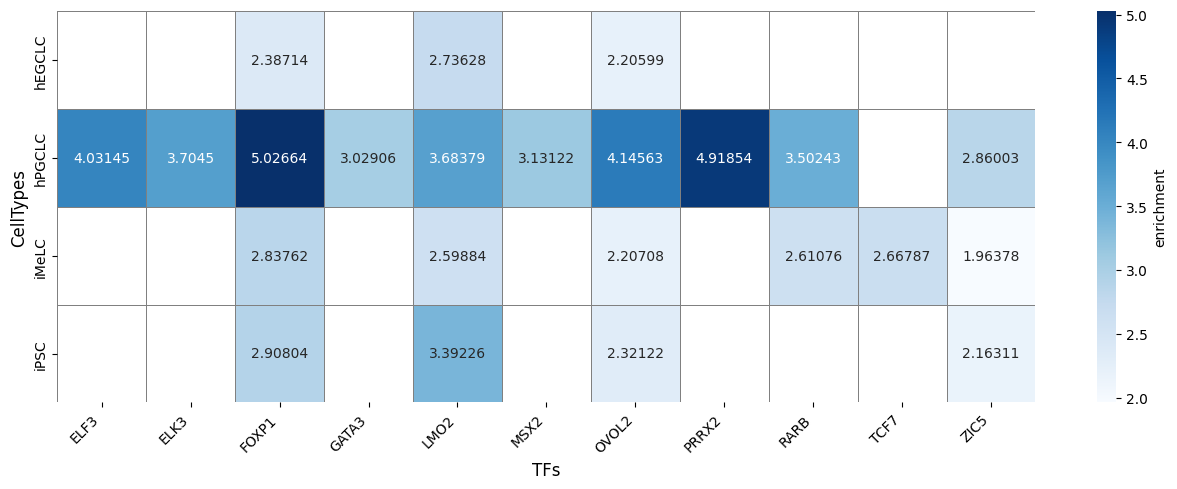

In [95]:
pivot_table = TFDMDE_enrichment_combined.pivot("celltype", "TF", "enrichment")

plt.figure(figsize=(13, 5))
heatmap = sns.heatmap(
    pivot_table,
    annot=True,
    cmap="Blues",
    fmt="g",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'enrichment'}
)


heatmap.set_xlabel('TFs', size=12)
heatmap.set_ylabel('CellTypes', size=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

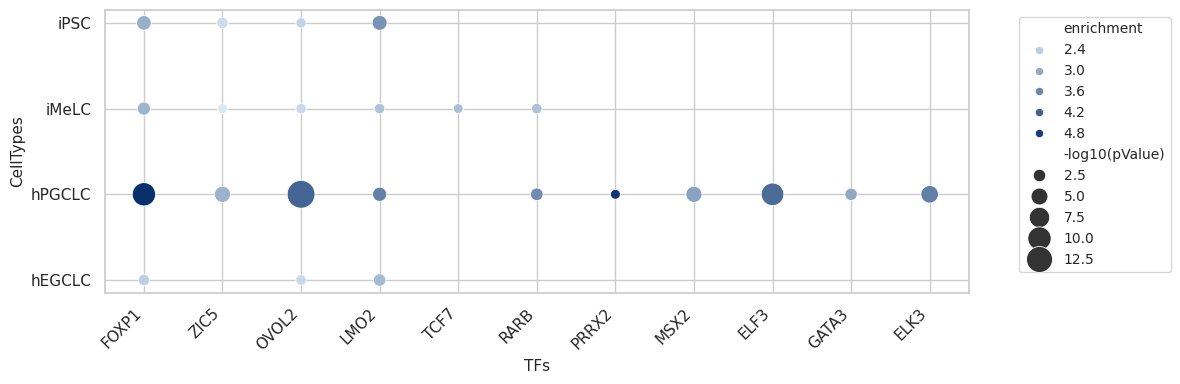

In [123]:
plt.figure(figsize=(12, 4))
sns.set_theme(style="whitegrid")

original_cmap = plt.get_cmap('Blues')
darken_cmap = LinearSegmentedColormap.from_list('dark_Blues', [original_cmap(0.15), original_cmap(1.0)], N=256)

sns.scatterplot(
    data=TFDMDE_enrichment_combined,
    x='TF',
    y='celltype',
    hue='enrichment',
    size='-log10(pValue)',
    sizes=(50, 400),
    palette=darken_cmap
    )

plt.xlabel('TFs', size=11)
plt.ylabel('CellTypes', size=11)
plt.xticks(rotation=45, ha='right')
plt.legend( fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [97]:
GRN_iPSC_13TF = GRN_iPSC_filt[GRN_iPSC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
print(GRN_iPSC_13TF.sort_values(by='coef_abs', ascending=False))

GRN_iPSC_13TF.to_csv('GRN_iPSC_13TF.csv', index=False)

GRN_iMeLC_13TF = GRN_iMeLC_filt[GRN_iMeLC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
print(GRN_iMeLC_13TF.sort_values(by='coef_abs', ascending=False))

GRN_iMeLC_13TF.to_csv('GRN_iMeLC_13TF.csv', index=False)

GRN_hPGCLC_13TF = GRN_PGCLC_filt[GRN_PGCLC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
print(GRN_hPGCLC_13TF.sort_values(by='coef_abs', ascending=False))

GRN_hPGCLC_13TF.to_csv('GRN_hPGCLC_13TF.csv', index=False)

GRN_hEGCLC_13TF = GRN_EGCLC_filt[GRN_EGCLC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
print(GRN_hEGCLC_13TF.sort_values(by='coef_abs', ascending=False))

GRN_hEGCLC_13TF.to_csv('GRN_hEGCLC_13TF.csv', index=False)

        Unnamed: 0 source     target  coef_mean  coef_abs             p  \
248835      248835   ELK3      RACK1  -0.461227  0.461227  1.120887e-18   
134504      134504   ELK3   HIST1H1C  -0.387532  0.387532  4.122939e-10   
135846      135846   ELK3  HIST1H2BH  -0.347674  0.347674  4.379518e-13   
143669      143669   ELK3    HSP90B1   0.295289  0.295289  5.417288e-15   
134452      134452   ZIC5   HIST1H1B  -0.268723  0.268723  1.318423e-08   
...            ...    ...        ...        ...       ...           ...   
318089      318089   ELF3     TRIM36   0.010004  0.010004  3.446703e-09   
215747      215747   ZIC5       PAK4   0.010004  0.010004  7.471403e-07   
216445      216445   ELK3      PAQR5  -0.010002  0.010002  2.691006e-08   
317826      317826   ZIC5     TRIM23  -0.010000  0.010000  2.219330e-10   
338789      338789  GATA3      YWHAB   0.010000  0.010000  2.352963e-09   

            -logp  
248835  17.950438  
134504   9.384793  
135846  12.358574  
143669  14.266218  

In [98]:
GRN_iPSC_13TF_expectedall = GRN_iPSC_13TF[GRN_iPSC_13TF['target'].isin(expected_all)]
GRN_iPSC_13TF_expectedall.to_csv('GRN_iPSC_13TF_expectedall.csv', index=False)

GRN_iMeLC_13TF_expectedall = GRN_iMeLC_13TF[GRN_iMeLC_13TF['target'].isin(expected_all)]
GRN_iMeLC_13TF_expectedall.to_csv('GRN_iMeLC_13TF_expectedall.csv', index=False)

GRN_hPGCLC_13TF_expectedall = GRN_hPGCLC_13TF[GRN_hPGCLC_13TF['target'].isin(expected_all)]
GRN_hPGCLC_13TF_expectedall.to_csv('GRN_hPGCLC_13TF_expectedall.csv', index=False)

GRN_hEGCLC_13TF_expectedall = GRN_hEGCLC_13TF[GRN_hEGCLC_13TF['target'].isin(expected_all)]
GRN_hEGCLC_13TF_expectedall.to_csv('GRN_hEGCLC_13TF_expectedall.csv', index=False)

### Cytoscape

##### hPGCLC

In [99]:
GRN_PGCLC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
4,4,E2F1,A4GALT,-0.011982,0.011982,1.966049e-09,8.706406
6,6,RFX3,A4GALT,-0.012635,0.012635,7.385996e-09,8.131591
9,9,KLF4,A4GALT,0.027695,0.027695,1.407787e-13,12.851463
11,11,SP8,A4GALT,-0.010359,0.010359,1.637664e-10,9.785775
14,14,FOXB2,A4GALT,0.010374,0.010374,1.412924e-10,9.849881
...,...,...,...,...,...,...,...
350450,350450,REST,ZYG11A,0.016032,0.016032,3.348030e-18,17.475211
350453,350453,MEF2A,ZYG11A,0.010208,0.010208,9.384473e-14,13.027590
350458,350458,NPAS1,ZYG11A,0.011459,0.011459,6.519771e-13,12.185768
350463,350463,TFAP2C,ZYG11A,0.020360,0.020360,2.841033e-19,18.546524


In [100]:
GRN_PGCLC_cyto1 = GRN_PGCLC_filt[GRN_PGCLC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
GRN_PGCLC_cyto1

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
53,53,LMO2,A4GALT,0.023551,0.023551,1.056805e-15,14.976005
56,56,OVOL2,A4GALT,0.012714,0.012714,6.383285e-12,11.194956
105,105,GATA3,A4GALT,-0.017881,0.017881,1.668532e-13,12.777666
414,414,ZIC5,AASS,0.027348,0.027348,1.612248e-22,21.792568
440,440,MSX2,AASS,-0.031137,0.031137,8.849539e-20,19.053079
...,...,...,...,...,...,...,...
349451,349451,ZIC5,ZNF850,0.013029,0.013029,7.244267e-12,11.140006
349547,349547,ELF3,ZPR1,0.011409,0.011409,1.611430e-13,12.792789
349556,349556,OVOL2,ZPR1,0.012896,0.012896,2.215100e-10,9.654607
350277,350277,ELK3,ZSWIM7,0.014401,0.014401,3.712457e-17,16.430339


In [101]:
GRN_PGCLC_cyto2 = GRN_PGCLC_filt[GRN_PGCLC_filt['target'].isin(commonTF_expected_all_GRNiPSC)]
GRN_PGCLC_cyto2

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
88695,88695,OVOL1,ELF3,0.010808,0.010808,7.244517e-15,14.139991
88697,88697,MAF,ELF3,0.011553,0.011553,8.798807e-14,13.055576
88965,88965,MAF,ELK3,0.011011,0.011011,1.717420e-17,16.765123
88974,88974,ETV5,ELK3,0.011128,0.011128,8.653431e-16,15.062812
88994,88994,BCL6,ELK3,-0.012313,0.012313,8.308876e-13,12.080458
...,...,...,...,...,...,...,...
342407,342407,ARID5B,ZIC5,-0.011111,0.011111,6.059643e-18,17.217553
342410,342410,ZIC2,ZIC5,0.013522,0.013522,2.449429e-17,16.610935
342433,342433,TFAP2C,ZIC5,-0.012293,0.012293,2.368252e-21,20.625572
342439,342439,MEF2C,ZIC5,0.012175,0.012175,4.485344e-13,12.348204


In [102]:
GRN_PGCLC_cyto3 =  pd.concat([GRN_PGCLC_cyto1, GRN_PGCLC_cyto2])
GRN_PGCLC_cyto4 = GRN_PGCLC_cyto3.drop_duplicates()
GRN_PGCLC_cyto4

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
53,53,LMO2,A4GALT,0.023551,0.023551,1.056805e-15,14.976005
56,56,OVOL2,A4GALT,0.012714,0.012714,6.383285e-12,11.194956
105,105,GATA3,A4GALT,-0.017881,0.017881,1.668532e-13,12.777666
414,414,ZIC5,AASS,0.027348,0.027348,1.612248e-22,21.792568
440,440,MSX2,AASS,-0.031137,0.031137,8.849539e-20,19.053079
...,...,...,...,...,...,...,...
342398,342398,POU3F4,ZIC5,0.010349,0.010349,2.434231e-12,11.613638
342407,342407,ARID5B,ZIC5,-0.011111,0.011111,6.059643e-18,17.217553
342410,342410,ZIC2,ZIC5,0.013522,0.013522,2.449429e-17,16.610935
342433,342433,TFAP2C,ZIC5,-0.012293,0.012293,2.368252e-21,20.625572


In [103]:
GRN_PGCLC_cyto_final = GRN_PGCLC_cyto4[GRN_PGCLC_cyto4['target'].isin(expected_all)]
GRN_PGCLC_cyto_final

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
53,53,LMO2,A4GALT,0.023551,0.023551,1.056805e-15,14.976005
56,56,OVOL2,A4GALT,0.012714,0.012714,6.383285e-12,11.194956
105,105,GATA3,A4GALT,-0.017881,0.017881,1.668532e-13,12.777666
2481,2481,ELF3,ACADL,0.018064,0.018064,1.473265e-11,10.831719
2488,2488,OVOL2,ACADL,0.011669,0.011669,4.484103e-09,8.348324
...,...,...,...,...,...,...,...
342398,342398,POU3F4,ZIC5,0.010349,0.010349,2.434231e-12,11.613638
342407,342407,ARID5B,ZIC5,-0.011111,0.011111,6.059643e-18,17.217553
342410,342410,ZIC2,ZIC5,0.013522,0.013522,2.449429e-17,16.610935
342433,342433,TFAP2C,ZIC5,-0.012293,0.012293,2.368252e-21,20.625572


In [104]:
GRN_PGCLC_cyto_final.to_csv('GRN_PGC_cytoscape.csv', index=False)

##### hiPSC

In [105]:
GRN_iPSC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
13,13,EGR1,A4GALT,-0.011337,0.011337,2.955064e-11,10.529433
21,21,FOS,A4GALT,0.011398,0.011398,1.493396e-09,8.825825
24,24,FOXP4,A4GALT,0.023915,0.023915,4.643730e-14,13.333133
25,25,SNAI1,A4GALT,0.010837,0.010837,2.070093e-13,12.684010
29,29,ELF3,A4GALT,0.013303,0.013303,5.879207e-13,12.230681
...,...,...,...,...,...,...,...
350434,350434,ZNF165,ZYG11A,0.013430,0.013430,9.960155e-12,11.001734
350451,350451,BHLHE40,ZYG11A,0.011117,0.011117,1.016146e-08,7.993044
350461,350461,ATF3,ZYG11A,0.014585,0.014585,5.512019e-15,14.258689
350462,350462,ZIC3,ZYG11A,0.022429,0.022429,7.037211e-19,18.152599


In [106]:
GRN_iPSC_cyto1 = GRN_iPSC_filt[GRN_iPSC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
GRN_iPSC_cyto1

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
29,29,ELF3,A4GALT,0.013303,0.013303,5.879207e-13,12.230681
53,53,LMO2,A4GALT,0.017735,0.017735,1.102182e-13,12.957747
90,90,ZIC5,A4GALT,0.013395,0.013395,1.373494e-07,6.862173
154,154,ELF3,AARSD1,0.018138,0.018138,1.601966e-10,9.795347
155,155,RARB,AARSD1,0.013204,0.013204,2.673889e-12,11.572857
...,...,...,...,...,...,...,...
349593,349593,GATA3,ZPR1,-0.027981,0.027981,4.769950e-14,13.321486
349804,349804,ELK3,ZSCAN2,0.030781,0.030781,8.699941e-12,11.060484
349829,349829,ELF3,ZSCAN2,-0.017729,0.017729,2.283838e-07,6.641335
350277,350277,ELK3,ZSWIM7,-0.014034,0.014034,1.158973e-06,5.935927


In [107]:
GRN_iPSC_cyto2 = GRN_iPSC_filt[GRN_iPSC_filt['target'].isin(commonTF_expected_all_GRNiPSC)]
GRN_iPSC_cyto2

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
88695,88695,OVOL1,ELF3,-0.013847,0.013847,1.358852e-15,14.866828
88708,88708,ELK3,ELF3,0.013378,0.013378,1.916311e-14,13.717534
88709,88709,EGR1,ELF3,0.010768,0.010768,1.250223e-08,7.903012
88710,88710,TFCP2,ELF3,0.011534,0.011534,9.640954e-11,10.015880
88716,88716,KLF5,ELF3,0.016137,0.016137,2.282798e-13,12.641532
...,...,...,...,...,...,...,...
342443,342443,GATA3,ZIC5,0.015403,0.015403,1.242694e-10,9.905636
342444,342444,SOX15,ZIC5,0.010086,0.010086,2.011335e-04,3.696516
342448,342448,SP3,ZIC5,0.058750,0.058750,1.746419e-11,10.757851
342449,342449,ZBTB6,ZIC5,0.010077,0.010077,1.321807e-06,5.878832


In [108]:
GRN_iPSC_cyto3 =  pd.concat([GRN_iPSC_cyto1, GRN_iPSC_cyto2])
GRN_iPSC_cyto4 = GRN_iPSC_cyto3.drop_duplicates()
GRN_iPSC_cyto4

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
29,29,ELF3,A4GALT,0.013303,0.013303,5.879207e-13,12.230681
53,53,LMO2,A4GALT,0.017735,0.017735,1.102182e-13,12.957747
90,90,ZIC5,A4GALT,0.013395,0.013395,1.373494e-07,6.862173
154,154,ELF3,AARSD1,0.018138,0.018138,1.601966e-10,9.795347
155,155,RARB,AARSD1,0.013204,0.013204,2.673889e-12,11.572857
...,...,...,...,...,...,...,...
342441,342441,BHLHE41,ZIC5,0.017330,0.017330,2.028516e-07,6.692822
342444,342444,SOX15,ZIC5,0.010086,0.010086,2.011335e-04,3.696516
342448,342448,SP3,ZIC5,0.058750,0.058750,1.746419e-11,10.757851
342449,342449,ZBTB6,ZIC5,0.010077,0.010077,1.321807e-06,5.878832


In [109]:
GRN_iPSC_cyto_final = GRN_iPSC_cyto4[GRN_iPSC_cyto4['target'].isin(expected_all)]
GRN_iPSC_cyto_final

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
29,29,ELF3,A4GALT,0.013303,0.013303,5.879207e-13,12.230681
53,53,LMO2,A4GALT,0.017735,0.017735,1.102182e-13,12.957747
90,90,ZIC5,A4GALT,0.013395,0.013395,1.373494e-07,6.862173
15061,15061,ELF3,ANK1,0.015547,0.015547,2.388566e-12,11.621863
19322,19322,OVOL2,ARHGAP8,0.033861,0.033861,1.025319e-09,8.989141
...,...,...,...,...,...,...,...
342441,342441,BHLHE41,ZIC5,0.017330,0.017330,2.028516e-07,6.692822
342444,342444,SOX15,ZIC5,0.010086,0.010086,2.011335e-04,3.696516
342448,342448,SP3,ZIC5,0.058750,0.058750,1.746419e-11,10.757851
342449,342449,ZBTB6,ZIC5,0.010077,0.010077,1.321807e-06,5.878832


In [110]:
GRN_iPSC_cyto_final.to_csv('GRN_iPSC_cytoscape.csv', index=False)

##### iMeLC

In [111]:
GRN_iMeLC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
3,3,MAF,A4GALT,0.010437,0.010437,9.697370e-13,12.013346
12,12,TFCP2,A4GALT,0.011424,0.011424,6.991379e-13,12.155437
45,45,POLR3G,A4GALT,0.013872,0.013872,1.354756e-11,10.868139
50,50,ZFP57,A4GALT,0.016220,0.016220,2.714614e-15,14.566292
56,56,OVOL2,A4GALT,0.016652,0.016652,6.244700e-14,13.204488
...,...,...,...,...,...,...,...
350434,350434,ZNF165,ZYG11A,0.017363,0.017363,4.585605e-12,11.338603
350441,350441,FOXH1,ZYG11A,0.023062,0.023062,2.598020e-14,13.585357
350450,350450,REST,ZYG11A,0.014005,0.014005,1.156650e-14,13.936798
350452,350452,ZIC2,ZYG11A,-0.015993,0.015993,2.509253e-11,10.600456


In [112]:
GRN_iMeLC_cyto1 = GRN_iMeLC_filt[GRN_iMeLC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
GRN_iMeLC_cyto1

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
56,56,OVOL2,A4GALT,0.016652,0.016652,6.244700e-14,13.204488
155,155,RARB,AARSD1,0.011641,0.011641,2.733939e-12,11.563211
187,187,LMO2,AARSD1,0.010155,0.010155,1.422782e-12,11.846862
230,230,ZIC5,AARSD1,0.016098,0.016098,2.562564e-11,10.591325
278,278,ELK3,AASS,0.070405,0.070405,1.770125e-16,15.751996
...,...,...,...,...,...,...,...
349829,349829,ELF3,ZSCAN2,0.010415,0.010415,2.157605e-09,8.666028
350277,350277,ELK3,ZSWIM7,-0.024761,0.024761,4.669515e-14,13.330728
350284,350284,PRRX2,ZSWIM7,0.018580,0.018580,8.251371e-14,13.083474
350298,350298,ELF3,ZSWIM7,-0.021717,0.021717,3.916052e-15,14.407152


In [113]:
GRN_iMeLC_cyto2 = GRN_iMeLC_filt[GRN_iMeLC_filt['target'].isin(commonTF_expected_all_GRNiPSC)]
GRN_iMeLC_cyto2

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
88962,88962,TCF7L1,ELK3,-0.011948,0.011948,9.778770e-10,9.009716
88976,88976,SP8,ELK3,-0.010335,0.010335,2.972205e-13,12.526921
88977,88977,TFCP2,ELK3,0.017199,0.017199,2.878845e-11,10.540782
88995,88995,FOXO1,ELK3,0.013059,0.013059,1.139062e-12,11.943452
89013,89013,CREB3L1,ELK3,0.013361,0.013361,1.799579e-12,11.744829
...,...,...,...,...,...,...,...
342436,342436,KLF6,ZIC5,0.010974,0.010974,1.684605e-11,10.773502
342438,342438,PKNOX2,ZIC5,-0.010062,0.010062,9.342705e-10,9.029527
342441,342441,BHLHE41,ZIC5,0.027396,0.027396,3.677205e-13,12.434482
342444,342444,SOX15,ZIC5,-0.010681,0.010681,1.158516e-08,7.936098


In [114]:
GRN_iMeLC_cyto3 =  pd.concat([GRN_iMeLC_cyto1, GRN_iMeLC_cyto2])
GRN_iMeLC_cyto4 = GRN_iMeLC_cyto3.drop_duplicates()
GRN_iMeLC_cyto4

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
56,56,OVOL2,A4GALT,0.016652,0.016652,6.244700e-14,13.204488
155,155,RARB,AARSD1,0.011641,0.011641,2.733939e-12,11.563211
187,187,LMO2,AARSD1,0.010155,0.010155,1.422782e-12,11.846862
230,230,ZIC5,AARSD1,0.016098,0.016098,2.562564e-11,10.591325
278,278,ELK3,AASS,0.070405,0.070405,1.770125e-16,15.751996
...,...,...,...,...,...,...,...
342436,342436,KLF6,ZIC5,0.010974,0.010974,1.684605e-11,10.773502
342438,342438,PKNOX2,ZIC5,-0.010062,0.010062,9.342705e-10,9.029527
342441,342441,BHLHE41,ZIC5,0.027396,0.027396,3.677205e-13,12.434482
342444,342444,SOX15,ZIC5,-0.010681,0.010681,1.158516e-08,7.936098


In [115]:
GRN_iMeLC_cyto_final = GRN_iMeLC_cyto4[GRN_iMeLC_cyto4['target'].isin(expected_all)]
GRN_iMeLC_cyto_final

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
56,56,OVOL2,A4GALT,0.016652,0.016652,6.244700e-14,13.204488
17418,17418,ELK3,APLNR,0.020163,0.020163,1.699266e-12,11.769739
19287,19287,ELK3,ARHGAP8,0.013718,0.013718,8.098435e-07,6.091599
19322,19322,OVOL2,ARHGAP8,0.032714,0.032714,3.410992e-11,10.467119
19347,19347,ZIC5,ARHGAP8,0.015903,0.015903,3.001244e-10,9.522699
...,...,...,...,...,...,...,...
342436,342436,KLF6,ZIC5,0.010974,0.010974,1.684605e-11,10.773502
342438,342438,PKNOX2,ZIC5,-0.010062,0.010062,9.342705e-10,9.029527
342441,342441,BHLHE41,ZIC5,0.027396,0.027396,3.677205e-13,12.434482
342444,342444,SOX15,ZIC5,-0.010681,0.010681,1.158516e-08,7.936098


In [116]:
GRN_iMeLC_cyto_final.to_csv('GRN_iMeLC_cytoscape.csv', index=False)

##### hEGCLC

In [117]:
GRN_EGCLC_filt

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
4,4,E2F1,A4GALT,0.012186,0.012186,2.743329e-10,9.561722
10,10,MYB,A4GALT,-0.011644,0.011644,1.174329e-06,5.930210
13,13,EGR1,A4GALT,-0.021030,0.021030,2.029755e-09,8.692556
15,15,ZNF143,A4GALT,-0.010884,0.010884,1.777862e-10,9.750102
33,33,KLF2,A4GALT,-0.010645,0.010645,5.090827e-11,10.293212
...,...,...,...,...,...,...,...
350359,350359,NPAS1,ZSWIM7,-0.013866,0.013866,3.799716e-13,12.420249
350363,350363,PBX2,ZSWIM7,0.046887,0.046887,2.019494e-13,12.694757
350367,350367,KLF6,ZSWIM7,0.033844,0.033844,2.047703e-14,13.688733
350415,350415,TCF7L2,ZYG11A,0.010945,0.010945,1.534989e-10,9.813895


In [118]:
GRN_EGCLC_cyto1 = GRN_EGCLC_filt[GRN_EGCLC_filt['source'].isin(commonTF_expected_all_GRNiPSC)]
GRN_EGCLC_cyto1

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
53,53,LMO2,A4GALT,0.018656,0.018656,7.913373e-12,11.101638
129,129,ELK3,AARSD1,0.021767,0.021767,3.068825e-12,11.513028
187,187,LMO2,AARSD1,-0.010638,0.010638,1.295345e-13,12.887615
191,191,OVOL2,AARSD1,0.023981,0.023981,2.207090e-15,14.656180
230,230,ZIC5,AARSD1,-0.026104,0.026104,2.995687e-12,11.523504
...,...,...,...,...,...,...,...
349991,349991,LMO2,ZSCAN25,-0.010526,0.010526,1.772576e-17,16.751395
350277,350277,ELK3,ZSWIM7,-0.046259,0.046259,6.755587e-15,14.170337
350284,350284,PRRX2,ZSWIM7,0.015225,0.015225,2.059283e-11,10.686284
350298,350298,ELF3,ZSWIM7,-0.012967,0.012967,6.320867e-11,10.199223


In [119]:
GRN_EGCLC_cyto2 = GRN_EGCLC_filt[GRN_EGCLC_filt['target'].isin(commonTF_expected_all_GRNiPSC)]
GRN_EGCLC_cyto2

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
88695,88695,OVOL1,ELF3,-0.025000,0.025000,7.044954e-16,15.152122
88704,88704,ID3,ELF3,-0.012820,0.012820,9.211341e-12,11.035677
88710,88710,TFCP2,ELF3,0.012519,0.012519,4.909585e-15,14.308955
88717,88717,ETS2,ELF3,-0.010985,0.010985,3.445869e-13,12.462701
88718,88718,HIC1,ELF3,0.013807,0.013807,1.291168e-12,11.889017
...,...,...,...,...,...,...,...
342432,342432,ZIC3,ZIC5,0.014187,0.014187,1.873290e-08,7.727395
342441,342441,BHLHE41,ZIC5,0.018040,0.018040,2.624662e-12,11.580927
342443,342443,GATA3,ZIC5,0.014054,0.014054,2.158350e-13,12.665878
342448,342448,SP3,ZIC5,0.082432,0.082432,4.051028e-15,14.392435


In [120]:
GRN_EGCLC_cyto3 =  pd.concat([GRN_EGCLC_cyto1, GRN_EGCLC_cyto2])
GRN_EGCLC_cyto4 = GRN_EGCLC_cyto3.drop_duplicates()
GRN_EGCLC_cyto4

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
53,53,LMO2,A4GALT,0.018656,0.018656,7.913373e-12,11.101638
129,129,ELK3,AARSD1,0.021767,0.021767,3.068825e-12,11.513028
187,187,LMO2,AARSD1,-0.010638,0.010638,1.295345e-13,12.887615
191,191,OVOL2,AARSD1,0.023981,0.023981,2.207090e-15,14.656180
230,230,ZIC5,AARSD1,-0.026104,0.026104,2.995687e-12,11.523504
...,...,...,...,...,...,...,...
342426,342426,HAND2,ZIC5,-0.016372,0.016372,1.269484e-11,10.896373
342432,342432,ZIC3,ZIC5,0.014187,0.014187,1.873290e-08,7.727395
342441,342441,BHLHE41,ZIC5,0.018040,0.018040,2.624662e-12,11.580927
342448,342448,SP3,ZIC5,0.082432,0.082432,4.051028e-15,14.392435


In [121]:
GRN_EGCLC_cyto_final = GRN_EGCLC_cyto4[GRN_EGCLC_cyto4['target'].isin(expected_all)]
GRN_EGCLC_cyto_final

,Unnamed: 0,source,target,coef_mean,coef_abs,p,-logp
53,53,LMO2,A4GALT,0.018656,0.018656,7.913373e-12,11.101638
15061,15061,ELF3,ANK1,-0.015010,0.015010,4.326182e-10,9.363895
15094,15094,OVOL2,ANK1,-0.012912,0.012912,6.356422e-12,11.196787
19287,19287,ELK3,ARHGAP8,-0.024587,0.024587,3.972067e-09,8.400983
19322,19322,OVOL2,ARHGAP8,0.027408,0.027408,1.226135e-07,6.911462
...,...,...,...,...,...,...,...
342426,342426,HAND2,ZIC5,-0.016372,0.016372,1.269484e-11,10.896373
342432,342432,ZIC3,ZIC5,0.014187,0.014187,1.873290e-08,7.727395
342441,342441,BHLHE41,ZIC5,0.018040,0.018040,2.624662e-12,11.580927
342448,342448,SP3,ZIC5,0.082432,0.082432,4.051028e-15,14.392435


In [122]:
GRN_EGCLC_cyto_final.to_csv('GRN_EGC_cytoscape.csv', index=False)